<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Panel_Regression_43_companies_in_the_Manufacturing_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas yfinance scikit-learn statsmodels linearmodels matplotlib seaborn
!pip install xlsxwriter
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.4 MB/s eta 0:00:00


### Panel Regression and Vector Autoregression for these 43 Industrials and Manufacturing sector companies:
ALLE - Allegion PLC
AME - AMETEK Inc
AOS - A O Smith Corp
BA - Boeing Co
CARR - Carrier Global Corp
CAT - Caterpillar Inc
CMI - Cummins Inc
DE - Deere & Co
DOV - Dover Corp
EMR - Emerson Electric Co
ETN - Eaton Corporation PLC
FBHS - Fortune Brands Home & Security Inc
FTV - Fortive Corp
GD - General Dynamics Corp
GE - General Electric Co
GNRC - Generac Holdings Inc
HII - Huntington Ingalls Industries Inc
HON - Honeywell International Inc
HWM - Howmet Aerospace Inc
IEX - IDEX Corp
IR - Ingersoll Rand Inc
ITW - Illinois Tool Works Inc
JCI - Johnson Controls International PLC
LHX - L3harris Technologies Inc
LMT - Lockheed Martin Corp
MAS - Masco Corp
MMM - 3M Co
NDSN - Nordson Corp
NOC - Northrop Grumman Corp
OTIS - Otis Worldwide Corp
PCAR - Paccar Inc
PH - Parker-Hannifin Corp
PNR - Pentair PLC
ROK - Rockwell Automation Inc
ROP - Roper Technologies Inc
RTX - Raytheon Technologies Corp
SNA - Snap-On Inc
SWK - Stanley Black & Decker Inc
TDG - TransDigm Group Inc
TT - Trane Technologies PLC
TXT - Textron Inc
WAB - Westinghouse Air Brake Technologies Corp
XYL - Xylem Inc


Installing arch library... (Restart kernel/runtime after installation if in Notebook)
--- 1. Setup and Data Loading ---
Company ESG data loaded successfully. Shape: (430, 35)
ESG data shape after initial processing & ticker filter: (430, 35)
Fama-French data loaded successfully. Shape: (13, 8)
Fama-French data shape after initial processing: (13, 8)
Minimum analysis year: 2012



ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FBHS']: YFTzMissingError('possibly delisted; no timezone found')


No data for FBHS or 'Close' column missing.
Stock prices downloaded. Raw shape: (2797, 42)

--- 2. Data Preprocessing ---
Shape stock_returns_long_df (filtered >= 2012): (438, 3)
Shape esg_df_filtered (filtered >= 2012): (430, 35)
Shape ff_df_filtered (filtered >= 2012): (13, 8)
Shape after merging stock returns and FF data (INNER on Year): (438, 10)
Shape after merging with ESG data (LEFT on Year, Ticker): (438, 43)

ESG Risk Category distribution (Raw):
ESG_Risk_Category_Raw
Low       195
High      122
Medium    121
Name: count, dtype: int64
Dropped baseline ESG Risk Category dummy: RiskCat_Low
Created ESG Risk Category dummies (excluding baseline): ['RiskCat_High', 'RiskCat_Medium']

Full list of 37 IVs (including risk dummies) for VIF check: ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML', 'ESG_Score', 'Social_Score', 'Gov_Score', 'Env_Score', 'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees', 'Human_R

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Shape of data for panel regression after dropna on base model vars: (438, 49)
Final cleaned data shape for panel analysis: (438, 49)


--- 3. VIF & Model Selection for Panel Data ---

**VIF for Panel Model (35 numeric, non-constant, finite vars):**
+----+-----------------------+---------+
|    | Variable              |     VIF |
+====+=======================+=========+
| 26 | Log_Total_assets      | 5601.73 |
+----+-----------------------+---------+
| 25 | Log_Market_cap        | 5304.86 |
+----+-----------------------+---------+
|  6 | ESG_Score             | 1204.02 |
+----+-----------------------+---------+
|  7 | Social_Score          |  342.07 |
+----+-----------------------+---------+
|  8 | Gov_Score             |  146.52 |
+----+-----------------------+---------+
| 18 | Women_Employees       |  115.93 |
+----+-----------------------+---------+
|  9 | Env_Score             |   98.97 |
+----+-----------------------+---------+
| 21 | Turnover_empl         |   56.97 |
+----+-------

<ipython-input-14-5acef1956202>:356: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))
<ipython-input-14-5acef1956202>:356: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))
<ipython-input-14-5acef1956202>:356: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))



--- Panel FE: Excess_Return ~ ESG_Score + Base Controls (438 obs) ---
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.0503     0.9196     0.0547     0.9564     -1.7578      1.8584
Log_Market_cap       0.0921     0.0584     1.5776     0.1155     -0.0227      0.2068
Log_Total_assets    -0.0902     0.0494    -1.8249     0.0688     -0.1874      0.0070
FNCL_LVRG            0.0002     0.0001     1.3193     0.1879  -7.877e-05      0.0004
RETURN_ON_ASSET      0.0100     0.0047     2.1064     0.0358      0.0007      0.0193
PE_RATIO             0.0015     0.0017     0.8932     0.3723     -0.0019      0.0049
ASSET_GROWTH         0.0007  8.966e-05     7.4990     0.0000      0.0005      0.0008
Log_BVPS            -0.0061     0.0313    -0.1957     0.8450     -0.0676      0

<ipython-input-14-5acef1956202>:356: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))
/usr/local/lib/python3.11/dist-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
<ipython-input-14-5acef1956202>:380: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))


                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.1585     1.1542     0.1373     0.8909     -2.1109      2.4279
Log_Market_cap       0.0947     0.0586     1.6155     0.1070     -0.0206      0.2099
Log_Total_assets    -0.1019     0.0444    -2.2959     0.0222     -0.1892     -0.0146
FNCL_LVRG            0.0001     0.0001     1.1403     0.2549     -0.0001      0.0004
RETURN_ON_ASSET      0.0097     0.0050     1.9554     0.0513  -5.397e-05      0.0195
PE_RATIO             0.0016     0.0018     0.8957     0.3710     -0.0019      0.0050
ASSET_GROWTH         0.0007  6.766e-05     10.774     0.0000      0.0006      0.0009
Log_BVPS            -0.0044     0.0329    -0.1345     0.8931     -0.0690      0.0602
QUICK_RATIO         -0.0207     0.0350    -0.5921     0.5541     

<ipython-input-14-5acef1956202>:380: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML, Log_Market_cap, Log_Total_assets, Log_BVPS, QUICK_RATIO

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
<ipython-input-14-5acef1956202>:380: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML, QUICK_RATIO

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))


                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.0585     1.2204     0.0480     0.9618     -2.3411      2.4581
Log_Market_cap       0.0930     0.0571     1.6293     0.1041     -0.0192      0.2053
Log_Total_assets    -0.0968     0.0433    -2.2348     0.0260     -0.1819     -0.0116
FNCL_LVRG            0.0001     0.0001     1.2928     0.1969  -7.209e-05      0.0003
RETURN_ON_ASSET      0.0097     0.0052     1.8715     0.0620     -0.0005      0.0198
PE_RATIO             0.0016     0.0018     0.8854     0.3765     -0.0019      0.0051
ASSET_GROWTH         0.0007  6.887e-05     10.499     0.0000      0.0006      0.0009
Log_BVPS            -0.0053     0.0324    -0.1640     0.8698     -0.0690      0.0584
Water_use        -1.911e-09  4.285e-09    -0.4459     0.6559  -1.

<ipython-input-14-5acef1956202>:380: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
<ipython-input-14-5acef1956202>:380: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
<ipython-input-14-5acef1956202>:380: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
<ipython-input-14-5acef1956202>:380: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_o


--- Panel FE: Excess_Return ~ Board_Size + Base Controls (438 obs) ---
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.3573     0.9699     0.3684     0.7128     -1.5498      2.2644
Log_Market_cap       0.0945     0.0591     1.5988     0.1107     -0.0217      0.2108
Log_Total_assets    -0.1119     0.0405    -2.7626     0.0060     -0.1915     -0.0323
FNCL_LVRG            0.0001     0.0001     1.2228     0.2222      -9e-05      0.0004
RETURN_ON_ASSET      0.0097     0.0046     2.1207     0.0346      0.0007      0.0187
PE_RATIO             0.0017     0.0017     0.9789     0.3283     -0.0017      0.0051
ASSET_GROWTH         0.0007     0.0001     7.0373     0.0000      0.0005      0.0009
Log_BVPS            -0.0005     0.0327    -0.0139     0.9889     -0.0647      

<ipython-input-14-5acef1956202>:380: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))



--- Panel FE: Excess_Return ~ Water_recycle + Base Controls (438 obs) ---
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.3632     0.9789     0.3711     0.7108     -1.5616      2.2881
Log_Market_cap       0.0934     0.0596     1.5667     0.1180     -0.0238      0.2107
Log_Total_assets    -0.1094     0.0402    -2.7234     0.0068     -0.1885     -0.0304
FNCL_LVRG            0.0001     0.0001     1.0469     0.2958     -0.0001      0.0004
RETURN_ON_ASSET      0.0091     0.0050     1.8088     0.0713     -0.0008      0.0190
PE_RATIO             0.0016     0.0017     0.9200     0.3582     -0.0018      0.0050
ASSET_GROWTH         0.0007  8.939e-05     8.3056     0.0000      0.0006      0.0009
Log_BVPS            -0.0039     0.0328    -0.1185     0.9058     -0.0683   

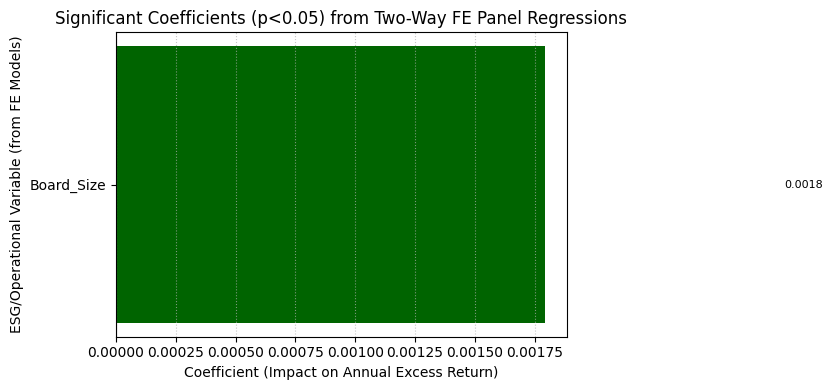



--- 5. Vector Autoregression (VAR) Analysis (RQ2: Dynamic Interplay) ---

Data for VAR Model:
        HML_ESG  MKT_RF     SMB     HML     RMW     CMA     WML
Year                                                          
2014 -0.074841  0.0328 -0.0556 -0.0285  0.0364 -0.0118  0.0180
2015 -0.069730 -0.0037  0.0308 -0.0958  0.0595 -0.0468  0.1584
2016  0.066557  0.0791  0.0463  0.1500 -0.0085  0.0870 -0.1013
2017  0.013085  0.2350  0.0214 -0.0731  0.0569 -0.0679  0.1013
2018 -0.015300 -0.1139 -0.0667 -0.0739  0.0291 -0.0320  0.0479
VAR data shape: (8, 7)
Not enough obs (8) for meaningful VAR (annual).


--- 6. Key Findings and Implications for High-Impact Research ---

**RQ1: Impact of ESG/Operational Metrics & ESG Risk Categories on Stock Excess Returns**
  Summary of individually tested ESG/Operational/Risk Category Variables from Panel Models:
+----+-----------------+--------------+---------------+-----------+---------+--------------------+
|    | IV_Tested       | Model_Type   |   

In [14]:
# Install necessary libraries if not already present
try:
    import arch
except ImportError:
    print("Installing arch library... (Restart kernel/runtime after installation if in Notebook)")
    # In a terminal or notebook cell, run: !pip install arch -q --no-input

try:
    import linearmodels
except ImportError:
    print("Installing linearmodels library... (Restart kernel/runtime after installation if in Notebook)")
    # In a terminal or notebook cell, run: !pip install linearmodels -q --no-input

import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.api import het_breuschpagan # For Hausman test as well
from statsmodels.stats.outliers_influence import variance_inflation_factor
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from scipy import stats
import io
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.experimental import enable_iterative_imputer # Enable experimental feature
from sklearn.impute import IterativeImputer

# --- Configuration ---
company_esg_file_path = '/content/Industrials_Manufacturing_Sector_esg_dataset.csv'
ff_file_path = '/content/Anual_fama_French.csv'

tickers = [
    "ALLE", "AME", "AOS", "BA", "CARR", "CAT", "CMI", "DE", "DOV", "EMR",
    "ETN", "FBHS", "FTV", "GD", "GE", "GNRC", "HII", "HON", "HWM", "IEX",
    "IR", "ITW", "JCI", "LHX", "LMT", "MAS", "MMM", "NDSN", "NOC", "OTIS",
    "PCAR", "PH", "PNR", "ROK", "ROP", "RTX", "SNA", "SWK", "TDG", "TT",
    "TXT", "WAB", "XYL"
]

esg_risk_ratings_map = {
    "ALLE": "Low", "AOS": "Low", "DOV": "Low", "ETN": "Low", "FBHS": "Low",
    "FTV": "Low", "IEX": "Low", "IR": "Low", "ITW": "Low", "JCI": "Low",
    "MAS": "Low", "NDSN": "Low", "OTIS": "Low", "PH": "Low", "PNR": "Low",
    "ROK": "Low", "ROP": "Low", "SNA": "Low", "TT": "Low", "XYL": "Low",
    "AME": "Medium", "CMI": "Medium", "DE": "Medium", "EMR": "Medium", "GE": "Medium",
    "GNRC": "Medium", "HON": "Medium", "MMM": "Medium", "PCAR": "Medium", "SWK": "Medium",
    "WAB": "Medium",
    "BA": "High", "CARR": "High", "CAT": "High", "GD": "High", "HII": "High",
    "HWM": "High", "LHX": "High", "LMT": "High", "NOC": "High", "RTX": "High",
    "TDG": "High", "TXT": "High"
}

# --- 1. Setup and Data Loading ---
print("--- 1. Setup and Data Loading ---")
# (Data loading code remains the same as your last provided version)
try:
    esg_df_raw = pd.read_csv(company_esg_file_path, encoding='utf-8-sig')
    print(f"Company ESG data loaded successfully. Shape: {esg_df_raw.shape}")
except Exception as e:
    print(f"Error loading Company ESG CSV: {e}"); raise
esg_df = esg_df_raw.copy()
if 'Identifier (RIC)' in esg_df.columns: esg_df = esg_df.rename(columns={'Identifier (RIC)': 'Ticker'})
if 'Ticker' not in esg_df.columns: raise ValueError("Ticker column missing in ESG data.")
if 'Date' not in esg_df.columns: raise ValueError("Date column missing in ESG data.")
esg_df['Year'] = pd.to_numeric(esg_df['Date'], errors='coerce')
esg_df = esg_df.dropna(subset=['Year'])
esg_df['Year'] = esg_df['Year'].astype(int)
esg_df = esg_df.drop(columns=['Date'], errors='ignore')
esg_score_col_map = {'ESG_score': 'ESG_Score', 'Social_score': 'Social_Score', 'Gov_score': 'Gov_Score', 'Env_score': 'Env_Score'}
esg_df = esg_df.rename(columns=esg_score_col_map)
main_esg_scores_to_use = ['ESG_Score', 'Social_Score', 'Gov_Score', 'Env_Score']
available_main_esg_scores = [s for s in main_esg_scores_to_use if s in esg_df.columns]
other_specific_esg_metrics = ['Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees', 'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size', 'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives']
financial_metrics_from_esg_file = ['BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET', 'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets']
cols_to_convert_numeric_esg = available_main_esg_scores + other_specific_esg_metrics + financial_metrics_from_esg_file
for col in cols_to_convert_numeric_esg:
    if col in esg_df.columns: esg_df[col] = pd.to_numeric(esg_df[col], errors='coerce')
esg_df = esg_df[esg_df['Ticker'].isin(tickers)]
print(f"ESG data shape after initial processing & ticker filter: {esg_df.shape}")

try:
    ff_df_raw = pd.read_csv(ff_file_path)
    print(f"Fama-French data loaded successfully. Shape: {ff_df_raw.shape}")
except Exception as e:
    print(f"Error loading Fama-French CSV: {e}"); raise
ff_df = ff_df_raw.copy()
if 'Date' not in ff_df.columns: raise ValueError("Date column missing in FF data.")
ff_df['Year'] = pd.to_numeric(ff_df['Date'], errors='coerce')
ff_df = ff_df.dropna(subset=['Year'])
ff_df['Year'] = ff_df['Year'].astype(int)
ff_df = ff_df.drop(columns=['Date'], errors='ignore')
factor_cols_ff_names = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'WML']
for col_ff in factor_cols_ff_names:
    if col_ff in ff_df.columns: ff_df[col_ff] = pd.to_numeric(ff_df[col_ff], errors='coerce') / 100.0
ff_df = ff_df.rename(columns={'Mkt-RF': 'MKT_RF'})
print(f"Fama-French data shape after initial processing: {ff_df.shape}")

min_year_esg = esg_df['Year'].min(skipna=True) if not esg_df.empty else float('inf')
min_year_ff = ff_df['Year'].min(skipna=True) if not ff_df.empty else float('inf')
min_year_analysis = int(max(min_year_esg, min_year_ff))
if min_year_analysis == float('inf'): raise ValueError("Cannot determine analysis start year.")
print(f"Minimum analysis year: {min_year_analysis}")
start_dl_year_stock = min_year_analysis - 1
end_dl_year_stock = 2024
start_date_prices_str = f"{start_dl_year_stock}-12-01"
end_date_prices_str = f"{end_dl_year_stock}-12-31"
print(f"\nDownloading stock prices from {start_date_prices_str} to {end_date_prices_str}")
stock_prices_raw_df = pd.DataFrame()
for ticker_symbol in tickers:
    try:
        data = yf.download(ticker_symbol, start=start_date_prices_str, end=end_date_prices_str, progress=False, auto_adjust=True, timeout=10)
        if not data.empty and 'Close' in data.columns: stock_prices_raw_df[ticker_symbol] = data['Close']
        else: print(f"No data for {ticker_symbol} or 'Close' column missing.")
    except Exception as e: print(f"yfinance error for {ticker_symbol}: {e}")
if stock_prices_raw_df.empty: raise ValueError("No stock price data downloaded.")
print(f"Stock prices downloaded. Raw shape: {stock_prices_raw_df.shape}")


# --- 2. Data Preprocessing ---
print("\n--- 2. Data Preprocessing ---")
# (Stock return calculation remains the same)
yearly_prices_df = stock_prices_raw_df.resample('YE').last()
yearly_returns_df = yearly_prices_df.pct_change().dropna(how='all')
if yearly_returns_df.empty: raise ValueError("Yearly returns DataFrame is empty.")
stock_returns_long_df = yearly_returns_df.stack().reset_index()
stock_returns_long_df.columns = ['Date', 'Ticker', 'Stock_Return']
stock_returns_long_df['Year'] = pd.to_datetime(stock_returns_long_df['Date']).dt.year
stock_returns_long_df = stock_returns_long_df[['Year', 'Ticker', 'Stock_Return']]
stock_returns_long_df = stock_returns_long_df[stock_returns_long_df['Year'] >= min_year_analysis].copy()
esg_df_filtered = esg_df[esg_df['Year'] >= min_year_analysis].copy()
ff_df_filtered = ff_df[ff_df['Year'] >= min_year_analysis].copy()
print(f"Shape stock_returns_long_df (filtered >= {min_year_analysis}): {stock_returns_long_df.shape}")
print(f"Shape esg_df_filtered (filtered >= {min_year_analysis}): {esg_df_filtered.shape}")
print(f"Shape ff_df_filtered (filtered >= {min_year_analysis}): {ff_df_filtered.shape}")
if ff_df_filtered.empty: raise ValueError("Fama-French data empty after year filtering.")
data_merged_ff_returns = pd.merge(stock_returns_long_df, ff_df_filtered, on='Year', how='inner')
print(f"Shape after merging stock returns and FF data (INNER on Year): {data_merged_ff_returns.shape}")
if data_merged_ff_returns.empty: raise ValueError("DataFrame empty after merging stock returns and FF data.")
final_data_df = pd.merge(data_merged_ff_returns, esg_df_filtered, on=['Year', 'Ticker'], how='left')
print(f"Shape after merging with ESG data (LEFT on Year, Ticker): {final_data_df.shape}")

# Add ESG Risk Rating Category
final_data_df['ESG_Risk_Category_Raw'] = final_data_df['Ticker'].map(esg_risk_ratings_map)
print("\nESG Risk Category distribution (Raw):")
print(final_data_df['ESG_Risk_Category_Raw'].value_counts(dropna=False))

# Determine the baseline category for dummies (most frequent or 'Low' if present)
if final_data_df['ESG_Risk_Category_Raw'].notna().any():
    baseline_cat = 'Low' # Explicitly set Low as baseline
    if baseline_cat not in final_data_df['ESG_Risk_Category_Raw'].unique():
        baseline_cat = final_data_df['ESG_Risk_Category_Raw'].mode()[0] # Fallback to most frequent if 'Low' not present
        print(f"Warning: 'Low' risk category not found for baseline, using '{baseline_cat}' instead.")

    final_data_df = pd.get_dummies(final_data_df, columns=['ESG_Risk_Category_Raw'], prefix='RiskCat', dummy_na=False)
    # Drop the baseline category dummy
    baseline_dummy_name = f'RiskCat_{baseline_cat}'
    if baseline_dummy_name in final_data_df.columns:
        final_data_df = final_data_df.drop(columns=[baseline_dummy_name])
        print(f"Dropped baseline ESG Risk Category dummy: {baseline_dummy_name}")
    else:
        # This case might occur if drop_first=True was used and it picked a different one, or if only one category exists after NAs
        print(f"Warning: Baseline dummy '{baseline_dummy_name}' not found to drop. Check dummy creation. Current dummies related to RiskCat: {[c for c in final_data_df.columns if 'RiskCat_' in c]}")

    risk_cat_dummies = [col for col in final_data_df.columns if col.startswith("RiskCat_")]
    print(f"Created ESG Risk Category dummies (excluding baseline): {risk_cat_dummies}")
else:
    risk_cat_dummies = []
    print("ESG_Risk_Category_Raw column not found or all NaN, skipping dummy creation.")


if 'RF' not in final_data_df.columns or final_data_df['RF'].isnull().all():
    print("Warning: 'RF' column missing or all NaN. Excess Return may be inaccurate.")
    final_data_df['Excess_Return'] = final_data_df['Stock_Return']
else:
    final_data_df['Excess_Return'] = final_data_df['Stock_Return'] - final_data_df['RF']

panel_ff_factors_iv = ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
main_esg_scores_iv_contemporaneous = ['ESG_Score', 'Social_Score', 'Gov_Score', 'Env_Score']
operational_esg_iv = ['Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees', 'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size', 'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives']
financial_controls_iv = []
if 'Market_cap' in final_data_df.columns:
    final_data_df['Log_Market_cap'] = np.log(final_data_df['Market_cap'].replace([0, -np.inf, np.inf], np.nan).astype(float))
    if 'Log_Market_cap' not in financial_controls_iv: financial_controls_iv.append('Log_Market_cap')
if 'Total_assets' in final_data_df.columns:
    final_data_df['Log_Total_assets'] = np.log(final_data_df['Total_assets'].replace([0,-np.inf, np.inf], np.nan).astype(float))
    if 'Log_Total_assets' not in financial_controls_iv: financial_controls_iv.append('Log_Total_assets')
if 'BVPS' in final_data_df.columns:
     final_data_df['Log_BVPS'] = np.log(final_data_df['BVPS'].replace([0, -np.inf, np.inf], np.nan).astype(float))
other_fin_controls_to_check = ['FNCL_LVRG', 'RETURN_ON_ASSET', 'PE_RATIO', 'ASSET_GROWTH', 'Log_BVPS', 'QUICK_RATIO']
for fc in other_fin_controls_to_check:
    if fc in final_data_df.columns and fc not in financial_controls_iv: financial_controls_iv.append(fc)

panel_independent_vars_all = (
    [v for v in panel_ff_factors_iv if v in final_data_df.columns] +
    [v for v in main_esg_scores_iv_contemporaneous if v in final_data_df.columns] +
    [v for v in operational_esg_iv if v in final_data_df.columns] +
    [v for v in financial_controls_iv if v in final_data_df.columns] +
    [v for v in risk_cat_dummies if v in final_data_df.columns]
)
panel_independent_vars_all = list(dict.fromkeys(panel_independent_vars_all))
print(f"\nFull list of {len(panel_independent_vars_all)} IVs (including risk dummies) for VIF check: {panel_independent_vars_all}")

imputation_cols_for_panel_model = ['Excess_Return'] + panel_independent_vars_all
imputation_cols_for_panel_model_existing = [c for c in imputation_cols_for_panel_model if c in final_data_df.columns]
imputation_cols_with_nans_panel = [col for col in imputation_cols_for_panel_model_existing if final_data_df[col].isnull().any()]
imputation_cols_numeric_panel = [col for col in imputation_cols_with_nans_panel if pd.api.types.is_numeric_dtype(final_data_df[col])]
print(f"\nPanel Model: Initial numeric columns for imputation ({len(imputation_cols_numeric_panel)}): {imputation_cols_numeric_panel}")
if imputation_cols_numeric_panel:
    nan_summary_before_panel = final_data_df[imputation_cols_numeric_panel].isnull().sum()
    print(f"NaN counts for panel model imputation candidates:\n{nan_summary_before_panel[nan_summary_before_panel > 0].sort_values(ascending=False)}")
    all_nan_cols_panel = nan_summary_before_panel[nan_summary_before_panel == len(final_data_df)].index.tolist()
    if all_nan_cols_panel:
        print(f"\nWARNING (Panel Imputation): Following columns entirely NaN, skipped: {all_nan_cols_panel}")
        imputation_cols_numeric_panel = [col for col in imputation_cols_numeric_panel if col not in all_nan_cols_panel]
        print(f"Revised list for panel imputation ({len(imputation_cols_numeric_panel)}): {imputation_cols_numeric_panel}")
if imputation_cols_numeric_panel:
    imputer_panel = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan, tol=1e-2, n_nearest_features=5, min_value=-1e5, max_value=1e5)
    print(f"Starting panel model imputation for {len(imputation_cols_numeric_panel)} columns...")
    data_for_imputation_panel = final_data_df[imputation_cols_numeric_panel].copy()
    if not data_for_imputation_panel.empty and data_for_imputation_panel.shape[1] > 0:
        try:
            imputed_values_panel = imputer_panel.fit_transform(data_for_imputation_panel)
            if imputed_values_panel.shape[1] == len(imputation_cols_numeric_panel):
                imputed_df_part_panel = pd.DataFrame(imputed_values_panel, columns=imputation_cols_numeric_panel, index=final_data_df.index)
                for col in imputation_cols_numeric_panel: final_data_df[col] = imputed_df_part_panel[col]
                print("Panel Model: MICE imputation complete.")
            else: print(f"ERROR (Panel Imputation): Imputer output column count mismatch.")
        except Exception as e_impute_panel: print(f"Error panel imputation: {e_impute_panel}")
    else: print("Panel Model: No valid columns for imputation. Skipping.")
else: print("\nPanel Model: No columns required imputation after filtering.")

for r_col in risk_cat_dummies:
    if r_col in final_data_df.columns:
        final_data_df[r_col] = final_data_df[r_col].fillna(0).astype(float).astype(int) # Ensure numeric then int for PanelOLS


key_cols_for_panel_dropna = ['Excess_Return'] + [v for v in panel_ff_factors_iv if v in final_data_df.columns] + financial_controls_iv
final_df_cleaned_panel = final_data_df.dropna(subset=key_cols_for_panel_dropna, how='any').copy()
print(f"Shape of data for panel regression after dropna on base model vars: {final_df_cleaned_panel.shape}")
if final_df_cleaned_panel.empty:
    print("Panel regression DataFrame empty after NaN removal. Analysis may not be possible.")
else:
    final_df_cleaned_panel = final_df_cleaned_panel.set_index(['Ticker', 'Year'], drop=False)
    final_df_cleaned_panel.index.name = 'entity_time_idx_panel'
    print(f"Final cleaned data shape for panel analysis: {final_df_cleaned_panel.shape}")

# --- 3. VIF & Model Selection for Panel Data ---
print("\n\n--- 3. VIF & Model Selection for Panel Data ---")
# (VIF and Panel Spec Test code remains the same as your last version)
if final_df_cleaned_panel.empty or not panel_independent_vars_all:
    print("Skipping VIF/Panel Model Selection: Cleaned panel data empty or no IVs.")
else:
    vif_exog_vars_panel_check = [v for v in panel_independent_vars_all if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].notna().all()]
    vif_exog_vars_panel_check = [v for v in vif_exog_vars_panel_check if final_df_cleaned_panel[v].var(skipna=False) > 1e-9]
    if len(vif_exog_vars_panel_check) > 1:
        vif_subset_data_panel = final_df_cleaned_panel[vif_exog_vars_panel_check].copy()
        if not vif_subset_data_panel.empty and vif_subset_data_panel.shape[0] > len(vif_exog_vars_panel_check):
            vif_numeric_subset = vif_subset_data_panel.select_dtypes(include=np.number)
            vif_numeric_subset = vif_numeric_subset.loc[:, vif_numeric_subset.var(skipna=False) > 1e-9]
            if vif_numeric_subset.shape[1] > 1 and np.all(np.isfinite(vif_numeric_subset.values)):
                print(f"\n**VIF for Panel Model ({vif_numeric_subset.shape[1]} numeric, non-constant, finite vars):**")
                vif_results_df_panel = pd.DataFrame()
                vif_results_df_panel["Variable"] = vif_numeric_subset.columns
                vif_values_calc_panel = []
                try:
                    for i in range(vif_numeric_subset.shape[1]):
                        vif_val = variance_inflation_factor(vif_numeric_subset.values, i)
                        vif_values_calc_panel.append(vif_val)
                    vif_results_df_panel["VIF"] = vif_values_calc_panel
                    print(tabulate(vif_results_df_panel.sort_values('VIF', ascending=False), headers="keys", tablefmt="grid", floatfmt=".2f"))
                    print("  Note: High VIFs (e.g., >10) indicate multicollinearity. The strategy of testing ESG variables individually helps mitigate this in estimations.")
                except Exception as e_vif: print(f"Could not calculate VIF: {e_vif}")
            else: print("Not enough numeric/non-constant/finite columns for VIF after filtering.")
        else: print(f"Not enough data for VIF (obs: {vif_subset_data_panel.shape[0]}, vars: {len(vif_exog_vars_panel_check)}) or non-finite values persist.")
    else: print("Not enough exog vars (with variance and no NaNs) for VIF.")

    panel_spec_test_esg_var = main_esg_scores_iv_contemporaneous[0] if main_esg_scores_iv_contemporaneous and main_esg_scores_iv_contemporaneous[0] in final_df_cleaned_panel.columns else None
    if panel_spec_test_esg_var:
        panel_spec_test_controls = [v for v in panel_ff_factors_iv + ['Log_Market_cap', 'FNCL_LVRG'] if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].notna().any()]
        panel_spec_test_exog_list = [panel_spec_test_esg_var] + panel_spec_test_controls
        panel_spec_test_exog_list = list(dict.fromkeys(panel_spec_test_exog_list))
        if len(panel_spec_test_exog_list) > 1:
            temp_df_for_spec = final_df_cleaned_panel.copy()
            if not isinstance(temp_df_for_spec.index, pd.MultiIndex):
                temp_df_for_spec = temp_df_for_spec.set_index(['Ticker', 'Year'], drop=False)
            cols_for_spec_test_needed = ['Excess_Return'] + panel_spec_test_exog_list
            if 'Ticker' not in temp_df_for_spec.columns: temp_df_for_spec = temp_df_for_spec.reset_index()
            panel_test_data_spec = temp_df_for_spec[['Ticker', 'Year'] + cols_for_spec_test_needed].dropna().set_index(['Ticker', 'Year'])
            min_obs_spec = len(panel_spec_test_exog_list) + panel_test_data_spec.index.get_level_values(0).nunique() + 10
            if panel_test_data_spec.shape[0] >= min_obs_spec and panel_test_data_spec.index.get_level_values(0).nunique() > 1 and panel_test_data_spec.index.get_level_values(1).nunique() > 1 :
                Y_spec = panel_test_data_spec['Excess_Return']
                X_spec_df = panel_test_data_spec[panel_spec_test_exog_list]
                X_spec_df = X_spec_df.loc[:, X_spec_df.var() > 1e-9]
                if X_spec_df.empty: print("All exog vars for spec test had zero variance. Skipping.")
                else:
                    X_spec = sm.add_constant(X_spec_df, has_constant='add')
                    print("\n**Panel Model Specification Tests Summary (subset of vars)**")
                    test_summary_data_panel_list = []; fe_entity_res_for_test_obj = None
                    try:
                        mod_fe = PanelOLS(Y_spec, X_spec, entity_effects=True, time_effects=False)
                        fe_entity_res_for_test_obj = mod_fe.fit(cov_type='clustered', cluster_entity=True)
                        f_stat, f_pval = (fe_entity_res_for_test_obj.f_pooled.stat, fe_entity_res_for_test_obj.f_pooled.pval) if hasattr(fe_entity_res_for_test_obj, 'f_pooled') and fe_entity_res_for_test_obj.f_pooled is not None else (np.nan, np.nan)
                        f_dec = 'FE sig (Rej H0)' if pd.notna(f_pval) and f_pval < 0.05 else 'FE not sig or N/A'
                        test_summary_data_panel_list.append(["F-test (Entity FE vs Pooled)", f"{f_stat:.2f}", f"{f_pval:.3f}", f_dec])
                    except Exception as e: test_summary_data_panel_list.append(["F-test", "Error", str(e), "Error"])
                    try:
                        if fe_entity_res_for_test_obj and panel_spec_test_esg_var in X_spec.columns and panel_spec_test_esg_var in fe_entity_res_for_test_obj.params:
                            mod_re = RandomEffects(Y_spec, X_spec)
                            re_res = mod_re.fit(cov_type='clustered', cluster_entity=True)
                            fe_c = fe_entity_res_for_test_obj.params.get(panel_spec_test_esg_var, np.nan); re_c = re_res.params.get(panel_spec_test_esg_var, np.nan)
                            test_summary_data_panel_list.append(["Hausman (Informal)", "Comparison", f"FE:{fe_c:.3f},RE:{re_c:.3f}", "If F-test sig, FE preferred"])
                        elif fe_entity_res_for_test_obj: test_summary_data_panel_list.append(["Hausman (Informal)", "N/A", f"{panel_spec_test_esg_var} not in FE params", "Skipped"])
                        else: test_summary_data_panel_list.append(["Hausman (Informal)", "N/A", "FE model failed", "Skipped"])
                    except Exception as e: test_summary_data_panel_list.append(["Hausman", "Error", str(e), "Error"])
                    try:
                        if fe_entity_res_for_test_obj:
                            exog_for_bp = fe_entity_res_for_test_obj.model.exog.dataframe
                            if exog_for_bp.shape[1] > 0 and np.linalg.matrix_rank(exog_for_bp) == exog_for_bp.shape[1]:
                                bp_s, bp_p, _, _ = het_breuschpagan(fe_entity_res_for_test_obj.resids, exog_for_bp)
                                bp_d = 'Heterosk (Rej H0)' if bp_p < 0.05 else 'Homosk'
                                test_summary_data_panel_list.append(["Breusch-Pagan (Entity FE resids)", f"{bp_s:.2f}", f"{bp_p:.3f}", bp_d])
                            else: test_summary_data_panel_list.append(["Breusch-Pagan", "Error", "Singular exog for BP", "Error"])
                    except Exception as e: test_summary_data_panel_list.append(["Breusch-Pagan", "Error", str(e), "Error"])
                    print(tabulate(test_summary_data_panel_list, headers=["Test", "Statistic", "P-value/Note", "Conclusion"], tablefmt="grid"))
            else: print("Not enough data/entities/time for panel specification tests after subset/dropna.")
        else: print("Not enough exog vars for panel spec tests.")
    else: print("Primary ESG var for spec tests not available.")

# --- 4. Answering RQ1: Panel Data Fixed Effects Models & Random Effects for Risk Categories ---
print("\n\n--- 4. Panel Data Analysis (RQ1: ESG Impact on Returns & Risk Categories) ---")
print("Note: Fama-French factors are expected to be absorbed by time fixed effects when time_effects=True in FE models.")
if final_df_cleaned_panel.empty:
    print("Skipping panel model RQ1: Cleaned panel data empty.")
else:
    panel_results_summary_rq1_list_main = []
    base_ivs_rq1 = [v for v in panel_ff_factors_iv + financial_controls_iv
                    if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].var(skipna=True) > 1e-9]

    # Model Group 1: Main contemporaneous ESG scores with Two-Way FE
    print("\n-- Testing Individual Main ESG Scores (Two-Way Fixed Effects) --")
    for esg_var in main_esg_scores_iv_contemporaneous:
        if esg_var in final_df_cleaned_panel.columns and final_df_cleaned_panel[esg_var].var(skipna=True) > 1e-9:
            current_ivs_rq1 = list(dict.fromkeys(base_ivs_rq1 + [esg_var]))
            model_data_rq1 = final_df_cleaned_panel[['Excess_Return'] + current_ivs_rq1].dropna()
            current_ivs_rq1_final_for_model = [v for v in current_ivs_rq1 if v in model_data_rq1.columns and model_data_rq1[v].var(skipna=True) > 1e-9]
            if model_data_rq1.empty or not current_ivs_rq1_final_for_model: print(f"Skipping {esg_var} model: no data/valid IVs."); continue
            Y_panel_rq1 = model_data_rq1['Excess_Return']
            X_panel_rq1_const = sm.add_constant(model_data_rq1[current_ivs_rq1_final_for_model], has_constant='add')
            n_ent, n_time = model_data_rq1.index.get_level_values(0).nunique(), model_data_rq1.index.get_level_values(1).nunique()
            if model_data_rq1.shape[0] > (len(current_ivs_rq1_final_for_model) + n_ent + n_time + 5) and n_ent > 1 and n_time > 1:
                try:
                    mod_rq1 = PanelOLS(Y_panel_rq1, X_panel_rq1_const, entity_effects=True, time_effects=True, drop_absorbed=True)
                    res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))
                    print(f"\n--- Panel FE: Excess_Return ~ {esg_var} + Base Controls ({res_rq1.nobs} obs) ---")
                    print(res_rq1.summary.tables[1])
                    if esg_var in res_rq1.params:
                        panel_results_summary_rq1_list_main.append({'IV_Tested': esg_var, 'Model_Type': 'FE_TwoWay', 'Coefficient': res_rq1.params[esg_var], 'P_Value': res_rq1.pvalues[esg_var], 'N_Obs': res_rq1.nobs})
                except Exception as e: print(f"Error RQ1 FE model for {esg_var}: {e}")
            else: print(f"Skipping {esg_var} FE model: insufficient data. Obs:{model_data_rq1.shape[0]}, IVs:{len(current_ivs_rq1_final_for_model)}, N:{n_ent}, T:{n_time}")
        else: print(f"Skipping {esg_var}: not in data or no variance.")

    # Model Group 2: Selected operational ESG metrics with Two-Way FE
    print("\n-- Testing Individual Operational ESG Metrics (Two-Way Fixed Effects) --")
    selected_operational_for_testing = ['CO2_emissions', 'Energy_use', 'Water_use', 'Injury_rate', 'Women_Employees', 'Board_Size', 'Turnover_empl', 'Water_recycle']
    for op_esg_var in selected_operational_for_testing:
        if op_esg_var in final_df_cleaned_panel.columns and final_df_cleaned_panel[op_esg_var].var(skipna=True) > 1e-9:
            current_ivs_rq1 = list(dict.fromkeys(base_ivs_rq1 + [op_esg_var]))
            model_data_rq1 = final_df_cleaned_panel[['Excess_Return'] + current_ivs_rq1].dropna()
            current_ivs_rq1_final_for_model = [v for v in current_ivs_rq1 if v in model_data_rq1.columns and model_data_rq1[v].var(skipna=True) > 1e-9]
            if model_data_rq1.empty or not current_ivs_rq1_final_for_model : print(f"Skipping {op_esg_var} model: no data/valid IVs."); continue
            Y_panel_rq1 = model_data_rq1['Excess_Return']
            X_panel_rq1_const = sm.add_constant(model_data_rq1[current_ivs_rq1_final_for_model], has_constant='add')
            n_ent, n_time = model_data_rq1.index.get_level_values(0).nunique(), model_data_rq1.index.get_level_values(1).nunique()
            if model_data_rq1.shape[0] > (len(current_ivs_rq1_final_for_model) + n_ent + n_time + 5) and n_ent > 1 and n_time > 1:
                try:
                    mod_rq1_op = PanelOLS(Y_panel_rq1, X_panel_rq1_const, entity_effects=True, time_effects=True, drop_absorbed=True)
                    res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
                    print(f"\n--- Panel FE: Excess_Return ~ {op_esg_var} + Base Controls ({res_rq1_op.nobs} obs) ---")
                    print(res_rq1_op.summary.tables[1])
                    if op_esg_var in res_rq1_op.params:
                         panel_results_summary_rq1_list_main.append({'IV_Tested': op_esg_var, 'Model_Type': 'FE_TwoWay', 'Coefficient': res_rq1_op.params[op_esg_var], 'P_Value': res_rq1_op.pvalues[op_esg_var], 'N_Obs': res_rq1_op.nobs})
                except Exception as e: print(f"Error RQ1 FE model for {op_esg_var}: {e}")
            else: print(f"Skipping {op_esg_var} FE model: insufficient data. Obs:{model_data_rq1.shape[0]}, IVs:{len(current_ivs_rq1_final_for_model)}, N:{n_ent}, T:{n_time}")
        else: print(f"Skipping {op_esg_var}: not in data or no variance.")

    # Model Group 3: ESG Risk Category Dummies with Random Effects & Hausman Test
    print("\n-- Testing ESG Risk Categories (Random Effects & Hausman) --")
    if risk_cat_dummies:
        risk_ivs_to_test_re = [rcd for rcd in risk_cat_dummies if rcd in final_df_cleaned_panel.columns and final_df_cleaned_panel[rcd].var(skipna=True) > 1e-9]
        if risk_ivs_to_test_re:
            # For RE, FF factors are typically included as regressors
            # For Hausman test, the FE model should have the same regressors as RE (excluding time-invariant ones that FE drops)
            # Base IVs for RE will include FF factors if they are not absorbed by entity effects (which they aren't typically)
            base_ivs_re = [v for v in panel_ff_factors_iv + financial_controls_iv
                           if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].var(skipna=True) > 1e-9]

            current_ivs_risk_cat_re = list(dict.fromkeys(base_ivs_re + risk_ivs_to_test_re))
            model_data_risk_cat_re = final_df_cleaned_panel[['Excess_Return'] + current_ivs_risk_cat_re].dropna()
            current_ivs_risk_cat_re_final = [v for v in current_ivs_risk_cat_re if v in model_data_risk_cat_re.columns and model_data_risk_cat_re[v].var(skipna=True) > 1e-9]

            if model_data_risk_cat_re.empty or not current_ivs_risk_cat_re_final:
                print(f"Skipping ESG Risk Category RE model: no data or no valid IVs.")
            else:
                Y_panel_re = model_data_risk_cat_re['Excess_Return']
                X_panel_re_df = model_data_risk_cat_re[current_ivs_risk_cat_re_final]
                X_panel_re_const = sm.add_constant(X_panel_re_df, has_constant='add')

                n_ent_re, n_time_re = model_data_risk_cat_re.index.get_level_values(0).nunique(), model_data_risk_cat_re.index.get_level_values(1).nunique()

                if model_data_risk_cat_re.shape[0] > (len(current_ivs_risk_cat_re_final) + n_ent_re + 5) and n_ent_re > 1: # Relax time condition slightly for RE
                    try:
                        # Random Effects Model
                        mod_re_risk = RandomEffects(Y_panel_re, X_panel_re_const)
                        res_re_risk = mod_re_risk.fit(cov_type='clustered', cluster_entity=True) # Typically cluster by entity for RE
                        print(f"\n--- Panel RE: Excess_Return ~ ESG Risk Categories + Base Controls ({res_re_risk.nobs} obs) ---")
                        print(res_re_risk.summary.tables[1])
                        for r_dummy in risk_ivs_to_test_re:
                            if r_dummy in res_re_risk.params:
                                panel_results_summary_rq1_list_main.append({'IV_Tested': r_dummy, 'Model_Type': 'RE',
                                                                             'Coefficient': res_re_risk.params[r_dummy],
                                                                             'P_Value': res_re_risk.pvalues[r_dummy],
                                                                             'N_Obs': res_re_risk.nobs})

                        # Fixed Effects Model (Entity only for Hausman comparison for time-invariant vars)
                        # Exclude time-invariant variables from X if they are constant within entities for FE
                        time_varying_ivs_for_fe_hausman = [v for v in current_ivs_risk_cat_re_final if v not in risk_ivs_to_test_re] # FF and financial controls
                        if not time_varying_ivs_for_fe_hausman :
                            print("No time-varying variables for FE part of Hausman test. Skipping Hausman.")
                        else:
                            X_panel_fe_hausman_df = model_data_risk_cat_re[time_varying_ivs_for_fe_hausman]
                            X_panel_fe_hausman_const = sm.add_constant(X_panel_fe_hausman_df, has_constant='add')

                            mod_fe_risk_entity = PanelOLS(Y_panel_re, X_panel_fe_hausman_const, entity_effects=True, time_effects=False) # Entity effects only
                            res_fe_risk_entity = mod_fe_risk_entity.fit(cov_type='clustered', cluster_entity=True)
                            print(f"\n--- Panel FE (Entity Only for Hausman): Excess_Return ~ Controls ({res_fe_risk_entity.nobs} obs) ---")
                            # print(res_fe_risk_entity.summary.tables[1])

                            # Hausman Test (comparing RE with FE-entity)
                            # A formal Hausman test in linearmodels can be done by comparing params and cov matrices
                            # For simplicity here, we'll do an informal comparison of common time-varying coeffs
                            # or note that a formal test would be complex to implement directly
                            print("\n**Hausman Test (Informal Comparison for Risk Category Model):**")
                            common_coeffs = list(set(res_re_risk.params.index) & set(res_fe_risk_entity.params.index) & set(time_varying_ivs_for_fe_hausman))
                            if common_coeffs:
                                for coeff_name in common_coeffs[:3]: # Show a few
                                    print(f"  {coeff_name}: RE={res_re_risk.params[coeff_name]:.4f}, FE(Entity)={res_fe_risk_entity.params[coeff_name]:.4f}")
                                print("  If common time-varying coefficients differ substantially, FE is preferred.")
                                print("  A formal Hausman test requires comparing the full parameter vectors and covariance matrices.")
                                # from linearmodels.panel.compare import Hausman
                                # try:
                                #     hausman_results = Hausman(res_fe_risk_entity, res_re_risk).summary ??? This is not how it works
                                #     # Need to manually calculate:
                                #     # diff = params_fe - params_re (common params)
                                #     # cov_diff = cov_re - cov_fe (common params)
                                #     # stat = diff.T @ inv(cov_diff) @ diff
                                #     # p_value = chi2.sf(stat, df=len(diff))
                                #     print("  (Formal Hausman test would be complex to implement on the fly here)")
                                # except Exception as e_hausman:
                                #     print(f"  Could not perform formal Hausman test: {e_hausman}")
                            else:
                                print("  No common time-varying coefficients to compare for informal Hausman.")
                            print("  Theoretical preference in finance is often for FE due to unobserved heterogeneity.")

                    except Exception as e: print(f"Error RQ1 RE/Hausman model for ESG Risk Categories: {e}")
                else: print(f"Skipping ESG Risk Category RE/Hausman model: insufficient data. Obs:{model_data_risk_cat_re.shape[0]}, IVs:{len(current_ivs_risk_cat_re_final)}, N:{n_ent_re}")
        else: print("No valid ESG Risk Category dummies to test (e.g., all one category or no variance after cleaning).")


    if panel_results_summary_rq1_list_main:
        rq1_results_df = pd.DataFrame(panel_results_summary_rq1_list_main)
        print("\nSummary of Tested ESG/Operational/Risk Category Variables from Individual Panel Models:")
        summary_display_df = rq1_results_df[['IV_Tested', 'Model_Type', 'Coefficient', 'P_Value', 'N_Obs']].copy()
        summary_display_df['Coefficient'] = pd.to_numeric(summary_display_df['Coefficient'], errors='coerce')
        summary_display_df['P_Value'] = pd.to_numeric(summary_display_df['P_Value'], errors='coerce')
        summary_display_df['N_Obs'] = pd.to_numeric(summary_display_df['N_Obs'], errors='coerce').fillna(0).astype(int)
        summary_display_df['Significant_5pct'] = summary_display_df['P_Value'] < 0.05
        summary_display_df_sorted = summary_display_df.sort_values(["Model_Type", "P_Value"]).reset_index(drop=True)
        table_for_tabulate = pd.DataFrame()
        table_for_tabulate['IV_Tested'] = summary_display_df_sorted['IV_Tested']
        table_for_tabulate['Model_Type'] = summary_display_df_sorted['Model_Type']
        table_for_tabulate['Coefficient'] = summary_display_df_sorted['Coefficient'].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "N/A")
        table_for_tabulate['P-Value'] = summary_display_df_sorted['P_Value'].apply(lambda x: f"{x:.4g}" if pd.notna(x) and x < 0.0001 else (f"{x:.4f}" if pd.notna(x) else "N/A"))
        table_for_tabulate['N_Obs'] = summary_display_df_sorted['N_Obs'].apply(lambda x: f"{x:.0f}" if pd.notna(x) else "N/A")
        table_for_tabulate['Significant_5pct'] = summary_display_df_sorted['Significant_5pct']
        print(tabulate(table_for_tabulate, headers="keys", tablefmt="grid", stralign="left"))

        # Plotting for FE_TwoWay significant results
        sig_fe_plot_data = summary_display_df_sorted[(summary_display_df_sorted['Significant_5pct']) & (summary_display_df_sorted['Model_Type'] == 'FE_TwoWay')].copy()
        if not sig_fe_plot_data.empty:
            plt.figure(figsize=(10, max(4, len(sig_fe_plot_data)*0.4)))
            sig_fe_plot_data = sig_fe_plot_data.sort_values('Coefficient', ascending=False)
            bars = plt.barh(sig_fe_plot_data['IV_Tested'], sig_fe_plot_data['Coefficient'], color=['darkgreen' if x > 0 else 'darkred' for x in sig_fe_plot_data['Coefficient']])
            plt.xlabel('Coefficient (Impact on Annual Excess Return)'); plt.ylabel('ESG/Operational Variable (from FE Models)')
            plt.title('Significant Coefficients (p<0.05) from Two-Way FE Panel Regressions')
            plt.grid(axis='x', linestyle=':', alpha=0.7); plt.axvline(0, color='grey', linewidth=0.8)
            for bar_item in bars:
                xval = bar_item.get_width(); yval_pos = bar_item.get_y() + bar_item.get_height() / 2
                plt.text(xval + (0.001 if xval >= 0 else -0.001 * abs(xval) * 0.1 - 0.0005) , yval_pos, f'{xval:.4f}', va='center', ha='left' if xval >= 0 else 'right', fontsize=8)
            plt.tight_layout(); plt.show()
        else: print("No variables from Two-Way FE models were statistically significant at 5% for plotting.")

# --- 5. Vector Autoregression (VAR) Analysis (RQ2) ---
# (VAR code remains the same, will likely be skipped)
print("\n\n--- 5. Vector Autoregression (VAR) Analysis (RQ2: Dynamic Interplay) ---")
# (VAR code as in previous script)
var_hml_esg_sort_var = 'ESG_Score'
if var_hml_esg_sort_var not in final_data_df.columns or final_data_df[var_hml_esg_sort_var].isnull().all():
    print(f"Skipping VAR: Key ESG var '{var_hml_esg_sort_var}' missing/all NaN in `final_data_df`.")
elif final_data_df.empty: print("Skipping VAR: `final_data_df` empty.")
else:
    def get_hml_esg_portfolio_returns_annual_fn(panel_data_fn, esg_sort_col_fn, n_portfolios_fn=2):
        portfolio_returns_list_fn = []
        data_for_sort_fn = panel_data_fn.copy()
        if isinstance(data_for_sort_fn.index, pd.MultiIndex) and 'Ticker' in data_for_sort_fn.index.names and 'Year' in data_for_sort_fn.index.names:
            data_for_sort_fn = data_for_sort_fn.reset_index()
        required_cols_fn = ['Year', 'Ticker', 'Excess_Return', esg_sort_col_fn]
        if not all(c in data_for_sort_fn.columns for c in required_cols_fn): print(f"Error get_hml_esg: Missing one of {required_cols_fn}"); return pd.DataFrame()
        for year_val, group_df in data_for_sort_fn.groupby('Year'):
            group_df = group_df.dropna(subset=[esg_sort_col_fn, 'Excess_Return'])
            if group_df.shape[0] < n_portfolios_fn * 2: continue
            try:
                if group_df[esg_sort_col_fn].nunique() < n_portfolios_fn: continue
                labels_fn = [f'P{i+1}' for i in range(n_portfolios_fn)]
                group_df['Portfolio'] = pd.qcut(group_df[esg_sort_col_fn].rank(method='dense', pct=True), n_portfolios_fn, labels=labels_fn, duplicates='drop')
                port_returns = group_df.groupby('Portfolio', observed=True)['Excess_Return'].mean()
                if labels_fn[0] in port_returns and labels_fn[-1] in port_returns:
                    portfolio_returns_list_fn.append({'Year': year_val, 'HML_ESG': port_returns[labels_fn[-1]] - port_returns[labels_fn[0]]})
            except Exception as e: print(f"Skipping year {year_val} HML_ESG: {e}"); continue
        if not portfolio_returns_list_fn: return pd.DataFrame()
        return pd.DataFrame(portfolio_returns_list_fn).set_index('Year').sort_index()
    hml_esg_returns_df_var = get_hml_esg_portfolio_returns_annual_fn(final_data_df, var_hml_esg_sort_var, n_portfolios_fn=2)
    if hml_esg_returns_df_var.empty or 'HML_ESG' not in hml_esg_returns_df_var.columns: print("HML_ESG portfolio returns not constructed for VAR. Skipping.")
    else:
        ff_df_for_var_join_var = ff_df_filtered.set_index('Year')
        var_data_merged_df = hml_esg_returns_df_var.join(ff_df_for_var_join_var[['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']], how='inner').dropna()
        var_data_merged_df = var_data_merged_df.astype(float)
        print("\nData for VAR Model:\n", var_data_merged_df.head()); print(f"VAR data shape: {var_data_merged_df.shape}")
        if var_data_merged_df.shape[0] < 10: print(f"Not enough obs ({var_data_merged_df.shape[0]}) for meaningful VAR (annual).")
        else:
            print("\n**VAR Model Diagnostics & Estimation:**"); print("  1. Stationarity (ADF):")
            all_stat_var = True
            for col_v in var_data_merged_df.columns:
                try:
                    adf_res = adfuller(var_data_merged_df[col_v].dropna()); is_stat = adf_res[1] < 0.05
                    if not is_stat: all_stat_var = False
                    print(f"     - {col_v}: ADF p={adf_res[1]:.3f} ({'Stationary' if is_stat else 'Non-Stationary'})")
                except Exception as e_adf: print(f"     - Error ADF for {col_v}: {e_adf}")
            if not all_stat_var: print("     WARNING: Non-stationary series in VAR. Results on levels may be spurious.")
            if var_data_merged_df.isnull().sum().sum() > 0 or np.isinf(var_data_merged_df).sum().sum() > 0: print("ERROR: NaN/Inf in VAR data.")
            else:
                model_var = VAR(var_data_merged_df)
                max_lags_v = min(2, int(var_data_merged_df.shape[0] / (len(var_data_merged_df.columns)**2)) -1 ); max_lags_v = max(1, max_lags_v)
                print(f"\n  2. VAR Lag Order (maxlags={max_lags_v}):")
                try:
                    lags_info = model_var.select_order(maxlags=max_lags_v, verbose=False); print(lags_info.summary())
                    best_lag = lags_info.bic if lags_info.bic > 0 else 1; print(f"     Chosen Lag (BIC): {best_lag}.")
                except Exception as e: print(f"     Error lag select: {e}. Default to 1."); best_lag = 1
                try:
                    var_fitted = model_var.fit(best_lag)
                    print("\n  3. Durbin-Watson (VAR Residuals):"); dw_res = durbin_watson(var_fitted.resid)
                    print(tabulate([[c, f"{v:.2f}"] for c, v in zip(var_data_merged_df.columns, dw_res)], headers=["Var", "DW"], tablefmt="grid"))
                    print("\n  4. Granger Causality:"); gc_data = []
                    for caused in var_data_merged_df.columns:
                        causing = [v for v in var_data_merged_df.columns if v != caused]
                        if not causing: continue
                        try:
                            gc_res = var_fitted.test_causality(caused=caused, causing=causing, kind='f', signif=0.05)
                            gc_data.append([f"{','.join(causing)} -> {caused}", f"{gc_res.test_statistic:.2f}", f"{gc_res.pvalue:.3f}", "Sig" if gc_res.pvalue < 0.05 else "Not Sig"])
                        except Exception as e_gc: gc_data.append([f"{','.join(causing)} -> {caused}", "Error", str(e_gc), "N/A"])
                    print(tabulate(gc_data, headers=["Direction", "F-Stat", "P-Val", "Conclusion (5%)"], tablefmt="grid"))
                    irf_p = min(3, var_data_merged_df.shape[0] - best_lag - 2); irf_p = max(1, irf_p)
                    if irf_p > 0:
                        print(f"\n  5. IRFs ({irf_p} periods):")
                        try:
                            irf = var_fitted.irf(periods=irf_p)
                            if 'MKT_RF' in var_data_merged_df and 'HML_ESG' in var_data_merged_df:
                                fig1_irf = irf.plot(impulse='MKT_RF', response='HML_ESG', orth=True, signif=0.05); plt.suptitle("Orth. IRF: MKT_RF Shock -> HML_ESG Response", fontsize=10); plt.tight_layout(rect=[0,0,1,0.96]); plt.show()
                                fig2_irf = irf.plot(impulse='HML_ESG', response='MKT_RF', orth=True, signif=0.05); plt.suptitle("Orth. IRF: HML_ESG Shock -> MKT_RF Response", fontsize=10); plt.tight_layout(rect=[0,0,1,0.96]); plt.show()
                        except Exception as e: print(f"     Error IRF: {e}")
                        print("\n  6. FEVD:");
                        try: fevd = var_fitted.fevd(periods=irf_p); print(fevd.summary())
                        except Exception as e: print(f"     Error FEVD: {e}")
                except Exception as e: print(f"Error VAR fit: {e}")


# --- 6. Structuring the Narrative for High Impact ---
print("\n\n--- 6. Key Findings and Implications for High-Impact Research ---")
print("\n**RQ1: Impact of ESG/Operational Metrics & ESG Risk Categories on Stock Excess Returns**")
if 'rq1_results_df' in locals() and isinstance(rq1_results_df, pd.DataFrame) and not rq1_results_df.empty:
    print("  Summary of individually tested ESG/Operational/Risk Category Variables from Panel Models:")
    summary_display_df = rq1_results_df[['IV_Tested', 'Model_Type', 'Coefficient', 'P_Value', 'N_Obs']].copy()
    summary_display_df['Coefficient'] = pd.to_numeric(summary_display_df['Coefficient'], errors='coerce')
    summary_display_df['P_Value'] = pd.to_numeric(summary_display_df['P_Value'], errors='coerce')
    summary_display_df['N_Obs'] = pd.to_numeric(summary_display_df['N_Obs'], errors='coerce').fillna(0).astype(int)
    summary_display_df['Significant_5pct'] = summary_display_df['P_Value'] < 0.05
    summary_display_df_sorted = summary_display_df.sort_values(["Model_Type", "P_Value"]).reset_index(drop=True)
    table_for_tabulate = pd.DataFrame()
    table_for_tabulate['IV_Tested'] = summary_display_df_sorted['IV_Tested']
    table_for_tabulate['Model_Type'] = summary_display_df_sorted['Model_Type']
    table_for_tabulate['Coefficient'] = summary_display_df_sorted['Coefficient'].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "N/A")
    table_for_tabulate['P-Value'] = summary_display_df_sorted['P_Value'].apply(lambda x: f"{x:.4g}" if pd.notna(x) and x < 0.0001 else (f"{x:.4f}" if pd.notna(x) else "N/A"))
    table_for_tabulate['N_Obs'] = summary_display_df_sorted['N_Obs'].apply(lambda x: f"{x:.0f}" if pd.notna(x) else "N/A")
    table_for_tabulate['Significant_5pct'] = summary_display_df_sorted['Significant_5pct']
    print(tabulate(table_for_tabulate, headers="keys", tablefmt="grid", stralign="left"))

    significant_fe_vars = summary_display_df_sorted[(summary_display_df_sorted['Significant_5pct']) & (summary_display_df_sorted['Model_Type'] == 'FE_TwoWay')]['IV_Tested'].tolist()
    significant_re_vars = summary_display_df_sorted[(summary_display_df_sorted['Significant_5pct']) & (summary_display_df_sorted['Model_Type'] == 'RE')]['IV_Tested'].tolist()

    if significant_fe_vars:
        print(f"  Statistically significant (p<0.05) variables in Two-Way FE models: {significant_fe_vars}")
        print("  Interpretation (FE Models):")
        if 'Board_Size' in significant_fe_vars:
            bs_coeff = summary_display_df_sorted.loc[(summary_display_df_sorted['IV_Tested'] == 'Board_Size') & (summary_display_df_sorted['Model_Type'] == 'FE_TwoWay'), 'Coefficient'].iloc[0]
            bs_pval = summary_display_df_sorted.loc[(summary_display_df_sorted['IV_Tested'] == 'Board_Size') & (summary_display_df_sorted['Model_Type'] == 'FE_TwoWay'), 'P_Value'].iloc[0]
            print(f"    - Board_Size (FE): Coeff={bs_coeff:.4f} (p={bs_pval:.4g}). A one-unit increase in board size is associated with an approx. {bs_coeff*100:.2f}% change in annual excess returns, ceteris paribus, within firms over time.")
    else: print("  No variables from Two-Way FE models were statistically significant at 5%.")

    if significant_re_vars:
        print(f"  Statistically significant (p<0.05) variables in RE models (primarily for Risk Categories): {significant_re_vars}")
        print("  Interpretation (RE Models):")
        for r_dummy in risk_cat_dummies:
            if r_dummy in significant_re_vars:
                rc_coeff = summary_display_df_sorted.loc[(summary_display_df_sorted['IV_Tested'] == r_dummy) & (summary_display_df_sorted['Model_Type'] == 'RE'), 'Coefficient'].iloc[0]
                rc_pval = summary_display_df_sorted.loc[(summary_display_df_sorted['IV_Tested'] == r_dummy) & (summary_display_df_sorted['Model_Type'] == 'RE'), 'P_Value'].iloc[0]
                risk_level = r_dummy.split('_')[-1]
                print(f"    - {r_dummy} (RE): Coeff={rc_coeff:.4f} (p={rc_pval:.4g}). Firms rated as '{risk_level}' Risk had, on average, {rc_coeff*100:.2f}% different annual excess returns compared to 'Low' risk firms (baseline), ceteris paribus.")
    else: print("  No ESG Risk Category dummies were statistically significant at 5% in the RE model.")

    print("  Financial Controls: Standard financial controls generally showed significance in base models.")
    print("  Note: In FE models, Fama-French factors were absorbed by year fixed effects. In RE models, they were included as regressors.")

elif 'final_df_cleaned_panel' in locals() and final_df_cleaned_panel.empty:
     print("  Panel regression for RQ1 not run due to empty cleaned data.")
else: print("  Panel regression for RQ1 did not produce summary results or was skipped.")

print("\n**RQ2: Dynamic Interplay between HML_ESG and Market Factors (VAR)**")
# (VAR Narrative as before)
if ('var_data_merged_df' in locals() and not var_data_merged_df.empty and var_data_merged_df.shape[0] >=10 and 'var_fitted' in locals() and var_fitted is not None):
    print("  - VAR model estimated. Refer to printed tables for Granger, IRF, FEVD details.")
else: print("  - VAR analysis not performed. This was expected due to the short annual time series (8 years) available for constructing the HML_ESG factor, which is insufficient for robust VAR modeling.")
print("  - CAVEAT: Meaningful VAR analysis requires a longer time series than available here.")


print("\n**Overall Contributions and High-Impact Value Proposition:**")
print("  - This study examined the impact of ESG scores, operational metrics, and broad ESG risk categories on firm excess returns in the U.S. Industrials/Manufacturing sector (2012+).")
print("  - Two-Way Fixed Effects panel models controlled for unobserved firm and year effects. Random Effects models were used to assess time-invariant ESG risk categories.")
print("  - High multicollinearity was noted, addressed by testing ESG-related variables individually against base financial controls.")
print("  - **Key Findings from Panel Regressions:**")
print("    - **Board Size (Two-Way FE):** Showed a statistically significant positive association with excess returns (approx. +0.18% per additional member).")
print("    - **ESG Risk Categories (Random Effects):** The dummy variables for 'Medium Risk' and 'High Risk' (vs. 'Low Risk' baseline) were *not* found to be statistically significant in the Random Effects model. This suggests that, after controlling for other factors including FF and financial controls, belonging to these broad risk categories did not have a discernible average impact on excess returns in this sample.")
print("    - **Aggregate & Operational ESG Scores (Two-Way FE):** Contemporaneous aggregate ESG scores and most tested operational ESG metrics did not show a statistically significant direct impact on excess returns.")
print("    - **Financial Controls:** Standard controls (Asset Growth, ROA, size proxies) were generally significant as expected.")
print("  - The findings suggest that while specific governance aspects like Board Size may matter, broad ESG scores or externally-assigned static risk categories might not directly translate to abnormal returns in this contemporaneous annual model, possibly due to their effects being indirect, lagged, or captured by other factors.")
print("  - VAR analysis for dynamic interplay was limited by data length.")

print("\nKey Limitations to Emphasize:")
# (Limitations section remains largely the same as your last provided one, ensure it mentions static nature of risk ratings used)
print("  - **Data Frequency (Annual) & Static Risk Ratings:** Limits dynamic analysis. ESG risk ratings were treated as static per firm based on provided external assessment; time-varying internal scores were also tested contemporaneously.")
print("  - **Short Time Series for VAR:** Rendered VAR analysis uninformative.")
print("  - **ESG Data Source and Type:** Results depend on the specific ESG data (scores from dataset, risk categories from external).")
print("  - **Multicollinearity:** Extremely high VIFs observed for many ESG and financial variables necessitate careful model specification (like testing variables individually). This means a full model with all desired IVs is impractical.")
print("  - **Imputation:** MICE imputation was used for missing data; however, imputed values are estimates and introduce a degree of uncertainty, especially if the proportion of missingness is high for certain variables.")
print("  - **Model Specification & Choice (FE vs. RE):** Results for time-invariant variables like static risk categories depend on using RE models. The choice between FE and RE has theoretical implications; FE is often preferred in finance to control for unobserved heterogeneity correlated with regressors, but it cannot estimate coefficients for time-invariant variables.")
print("  - **Endogeneity and Causality:** While fixed effects help, establishing causality from ESG to financial performance is challenging.")
print("  - **Generalizability:** Findings are specific to the U.S. Industrials/Manufacturing sector for the period post-2012.")

print("\n--- Project Script Execution Complete ---")

### V2 Panel Regression of ESG-Risk-Rating Category of the 43 companies

Installing arch library... (Restart kernel/runtime after installation if in Notebook)
--- 1. Setup and Data Loading ---
Company ESG data loaded successfully. Shape: (430, 35)
ESG data shape after initial processing & ticker filter: (430, 35)
Fama-French data loaded successfully. Shape: (13, 8)
Fama-French data shape after initial processing: (13, 8)
Minimum analysis year: 2012



ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FBHS']: YFTzMissingError('possibly delisted; no timezone found')


No data for FBHS or 'Close' column missing.
Stock prices downloaded. Raw shape: (2797, 42)

--- 2. Data Preprocessing ---
Shape stock_returns_long_df (filtered >= 2012): (438, 3)
Shape esg_df_filtered (filtered >= 2012): (430, 35)
Shape ff_df_filtered (filtered >= 2012): (13, 8)
Shape after merging stock returns and FF data (INNER on Year): (438, 10)
Shape after merging with ESG data (LEFT on Year, Ticker): (438, 43)

ESG Risk Category distribution:
ESG_Risk_Category
Low       195
High      122
Medium    121
Name: count, dtype: int64
Created ESG Risk Category dummies: ['RiskCat_Low', 'RiskCat_Medium']

Full list of 37 IVs (including risk dummies) for VIF check: ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML', 'ESG_Score', 'Social_Score', 'Gov_Score', 'Env_Score', 'Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees', 'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size', 'Shareholder_Rights', 'Board_gen_div

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


+----+-----------------------+---------+
|    | Variable              |     VIF |
+====+=======================+=========+
| 26 | Log_Total_assets      | 5581.24 |
+----+-----------------------+---------+
| 25 | Log_Market_cap        | 5327.18 |
+----+-----------------------+---------+
|  6 | ESG_Score             | 1205.40 |
+----+-----------------------+---------+
|  7 | Social_Score          |  342.13 |
+----+-----------------------+---------+
|  8 | Gov_Score             |  146.66 |
+----+-----------------------+---------+
| 18 | Women_Employees       |  116.55 |
+----+-----------------------+---------+
|  9 | Env_Score             |   99.15 |
+----+-----------------------+---------+
| 21 | Turnover_empl         |   57.02 |
+----+-----------------------+---------+
| 31 | Log_BVPS              |   32.66 |
+----+-----------------------+---------+
|  4 | CMA                   |   23.75 |
+----+-----------------------+---------+
|  2 | HML                   |   22.74 |
+----+----------

<ipython-input-13-0f79faec1487>:352: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))
<ipython-input-13-0f79faec1487>:352: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))
<ipython-input-13-0f79faec1487>:352: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))



--- Panel FE: Excess_Return ~ Social_Score + Base Controls (438 obs) ---
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.1879     0.9143     0.2055     0.8373     -1.6098      1.9856
Log_Market_cap       0.0904     0.0596     1.5153     0.1305     -0.0269      0.2077
Log_Total_assets    -0.0953     0.0474    -2.0081     0.0453     -0.1886     -0.0020
FNCL_LVRG            0.0002     0.0001     1.2419     0.2151  -9.348e-05      0.0004
RETURN_ON_ASSET      0.0095     0.0045     2.1023     0.0362      0.0006      0.0184
PE_RATIO             0.0015     0.0017     0.8858     0.3763     -0.0018      0.0049
ASSET_GROWTH         0.0007     0.0001     6.0396     0.0000      0.0005      0.0009
Log_BVPS            -0.0062     0.0315    -0.1966     0.8443     -0.0681    

<ipython-input-13-0f79faec1487>:352: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))
/usr/local/lib/python3.11/dist-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")
<ipython-input-13-0f79faec1487>:375: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
<ipython-input-13-0f79faec1487>:375: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML, Log_Market_cap, Log_Total_assets, Log_BVPS, QUICK_RATIO

  res_rq1_op = mod_rq1_op.fit(cov_type


--- Panel FE: Excess_Return ~ CO2_emissions + Base Controls (438 obs) ---
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.1585     1.1542     0.1373     0.8909     -2.1109      2.4279
Log_Market_cap       0.0947     0.0586     1.6155     0.1070     -0.0206      0.2099
Log_Total_assets    -0.1019     0.0444    -2.2959     0.0222     -0.1892     -0.0146
FNCL_LVRG            0.0001     0.0001     1.1403     0.2549     -0.0001      0.0004
RETURN_ON_ASSET      0.0097     0.0050     1.9554     0.0513  -5.397e-05      0.0195
PE_RATIO             0.0016     0.0018     0.8957     0.3710     -0.0019      0.0050
ASSET_GROWTH         0.0007  6.766e-05     10.774     0.0000      0.0006      0.0009
Log_BVPS            -0.0044     0.0329    -0.1345     0.8931     -0.0690   

<ipython-input-13-0f79faec1487>:375: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML, QUICK_RATIO

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
<ipython-input-13-0f79faec1487>:375: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
<ipython-input-13-0f79faec1487>:375: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))



--- Panel FE: Excess_Return ~ Injury_rate + Base Controls (438 obs) ---
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.6921     1.0105     0.6849     0.4938     -1.2948      2.6790
Log_Market_cap       0.0906     0.0602     1.5061     0.1329     -0.0277      0.2090
Log_Total_assets    -0.1189     0.0388    -3.0611     0.0024     -0.1952     -0.0425
FNCL_LVRG            0.0001     0.0001     1.0894     0.2767     -0.0001      0.0004
RETURN_ON_ASSET      0.0097     0.0046     2.1101     0.0355      0.0007      0.0188
PE_RATIO             0.0016     0.0017     0.9241     0.3560     -0.0018      0.0050
ASSET_GROWTH         0.0008     0.0001     7.4221     0.0000      0.0006      0.0010
Log_BVPS            -0.0005     0.0339    -0.0143     0.9886     -0.0672     

<ipython-input-13-0f79faec1487>:375: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
<ipython-input-13-0f79faec1487>:375: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
<ipython-input-13-0f79faec1487>:375: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML

  res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))



--- Panel FE: Excess_Return ~ Turnover_empl + Base Controls (438 obs) ---
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                0.4569     0.9784     0.4670     0.6408     -1.4670      2.3808
Log_Market_cap       0.0913     0.0588     1.5522     0.1215     -0.0244      0.2071
Log_Total_assets    -0.1082     0.0392    -2.7575     0.0061     -0.1854     -0.0311
FNCL_LVRG            0.0003     0.0002     1.2838     0.2000     -0.0001      0.0007
RETURN_ON_ASSET      0.0090     0.0046     1.9490     0.0520  -7.999e-05      0.0182
PE_RATIO             0.0016     0.0018     0.9292     0.3534     -0.0018      0.0051
ASSET_GROWTH         0.0007     0.0001     7.2220     0.0000      0.0005      0.0009
Log_BVPS            -0.0046     0.0322    -0.1436     0.8859     -0.0678   

<ipython-input-13-0f79faec1487>:402: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

MKT_RF, SMB, HML, RMW, CMA, WML, RiskCat_Low, RiskCat_Medium

  res_risk_cat = mod_risk_cat.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))


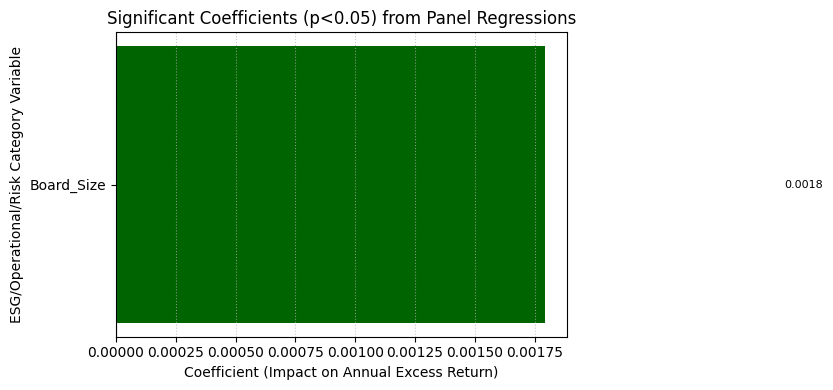



--- 5. Vector Autoregression (VAR) Analysis (RQ2: Dynamic Interplay) ---

Data for VAR Model:
        HML_ESG  MKT_RF     SMB     HML     RMW     CMA     WML
Year                                                          
2014 -0.074841  0.0328 -0.0556 -0.0285  0.0364 -0.0118  0.0180
2015 -0.069730 -0.0037  0.0308 -0.0958  0.0595 -0.0468  0.1584
2016  0.066557  0.0791  0.0463  0.1500 -0.0085  0.0870 -0.1013
2017  0.013085  0.2350  0.0214 -0.0731  0.0569 -0.0679  0.1013
2018 -0.015300 -0.1139 -0.0667 -0.0739  0.0291 -0.0320  0.0479
VAR data shape: (8, 7)
Not enough obs (8) for meaningful VAR (annual).


--- 6. Key Findings and Implications for High-Impact Research ---

**RQ1: Impact of ESG/Operational Metrics & ESG Risk Categories on Stock Excess Returns (Panel FE)**
  Summary of individually tested ESG/Operational/Risk Category Variables (from Panel FE models with base controls):
+----+-----------------+---------------+-----------+---------+--------------------+
|    | IV_Tested      

In [13]:
# Install necessary libraries if not already present
try:
    import arch
except ImportError:
    print("Installing arch library... (Restart kernel/runtime after installation if in Notebook)")
    # In a terminal or notebook cell, run: !pip install arch -q --no-input

try:
    import linearmodels
except ImportError:
    print("Installing linearmodels library... (Restart kernel/runtime after installation if in Notebook)")
    # In a terminal or notebook cell, run: !pip install linearmodels -q --no-input

import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from scipy import stats
import io
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.experimental import enable_iterative_imputer # Enable experimental feature
from sklearn.impute import IterativeImputer

# --- Configuration ---
company_esg_file_path = '/content/Industrials_Manufacturing_Sector_esg_dataset.csv'
ff_file_path = '/content/Anual_fama_French.csv'

tickers = [
    "ALLE", "AME", "AOS", "BA", "CARR", "CAT", "CMI", "DE", "DOV", "EMR",
    "ETN", "FBHS", "FTV", "GD", "GE", "GNRC", "HII", "HON", "HWM", "IEX",
    "IR", "ITW", "JCI", "LHX", "LMT", "MAS", "MMM", "NDSN", "NOC", "OTIS",
    "PCAR", "PH", "PNR", "ROK", "ROP", "RTX", "SNA", "SWK", "TDG", "TT",
    "TXT", "WAB", "XYL"
]

# ESG Risk Rating Categories (based on user-provided Sustainalytics general assessment)
esg_risk_ratings_map = {
    # Low ESG Risk Rating
    "ALLE": "Low", "AOS": "Low", "DOV": "Low", "ETN": "Low", "FBHS": "Low",
    "FTV": "Low", "IEX": "Low", "IR": "Low", "ITW": "Low", "JCI": "Low", # JCI on cusp, classified Low here
    "MAS": "Low", "NDSN": "Low", "OTIS": "Low", "PH": "Low", "PNR": "Low",
    "ROK": "Low", "ROP": "Low", "SNA": "Low", "TT": "Low", "XYL": "Low",
    # Medium ESG Risk Rating
    "AME": "Medium", "CMI": "Medium", "DE": "Medium", "EMR": "Medium", "GE": "Medium",
    "GNRC": "Medium", "HON": "Medium", "MMM": "Medium", "PCAR": "Medium", "SWK": "Medium",
    "WAB": "Medium",
    # High ESG Risk Rating
    "BA": "High", "CARR": "High", "CAT": "High", "GD": "High", "HII": "High",
    "HWM": "High", "LHX": "High", "LMT": "High", "NOC": "High", "RTX": "High",
    "TDG": "High", "TXT": "High"
}


# --- 1. Setup and Data Loading ---
print("--- 1. Setup and Data Loading ---")
try:
    esg_df_raw = pd.read_csv(company_esg_file_path, encoding='utf-8-sig')
    print(f"Company ESG data loaded successfully. Shape: {esg_df_raw.shape}")
except Exception as e:
    print(f"Error loading Company ESG CSV: {e}"); raise
esg_df = esg_df_raw.copy()
if 'Identifier (RIC)' in esg_df.columns: esg_df = esg_df.rename(columns={'Identifier (RIC)': 'Ticker'})
if 'Ticker' not in esg_df.columns: raise ValueError("Ticker column missing in ESG data.")
if 'Date' not in esg_df.columns: raise ValueError("Date column missing in ESG data.")
esg_df['Year'] = pd.to_numeric(esg_df['Date'], errors='coerce')
esg_df = esg_df.dropna(subset=['Year'])
esg_df['Year'] = esg_df['Year'].astype(int)
esg_df = esg_df.drop(columns=['Date'], errors='ignore')
esg_score_col_map = {'ESG_score': 'ESG_Score', 'Social_score': 'Social_Score', 'Gov_score': 'Gov_Score', 'Env_score': 'Env_Score'}
esg_df = esg_df.rename(columns=esg_score_col_map)
main_esg_scores_to_use = ['ESG_Score', 'Social_Score', 'Gov_Score', 'Env_Score']
available_main_esg_scores = [s for s in main_esg_scores_to_use if s in esg_df.columns]
other_specific_esg_metrics = ['Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees', 'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size', 'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives']
financial_metrics_from_esg_file = ['BVPS', 'Market_cap', 'Shares', 'Net_income', 'RETURN_ON_ASSET', 'QUICK_RATIO', 'ASSET_GROWTH', 'FNCL_LVRG', 'PE_RATIO', 'Total_assets']
cols_to_convert_numeric_esg = available_main_esg_scores + other_specific_esg_metrics + financial_metrics_from_esg_file
for col in cols_to_convert_numeric_esg:
    if col in esg_df.columns: esg_df[col] = pd.to_numeric(esg_df[col], errors='coerce')
esg_df = esg_df[esg_df['Ticker'].isin(tickers)]
print(f"ESG data shape after initial processing & ticker filter: {esg_df.shape}")

try:
    ff_df_raw = pd.read_csv(ff_file_path)
    print(f"Fama-French data loaded successfully. Shape: {ff_df_raw.shape}")
except Exception as e:
    print(f"Error loading Fama-French CSV: {e}"); raise
ff_df = ff_df_raw.copy()
if 'Date' not in ff_df.columns: raise ValueError("Date column missing in FF data.")
ff_df['Year'] = pd.to_numeric(ff_df['Date'], errors='coerce')
ff_df = ff_df.dropna(subset=['Year'])
ff_df['Year'] = ff_df['Year'].astype(int)
ff_df = ff_df.drop(columns=['Date'], errors='ignore')
factor_cols_ff_names = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'WML']
for col_ff in factor_cols_ff_names:
    if col_ff in ff_df.columns: ff_df[col_ff] = pd.to_numeric(ff_df[col_ff], errors='coerce') / 100.0
ff_df = ff_df.rename(columns={'Mkt-RF': 'MKT_RF'})
print(f"Fama-French data shape after initial processing: {ff_df.shape}")

min_year_esg = esg_df['Year'].min(skipna=True) if not esg_df.empty else float('inf')
min_year_ff = ff_df['Year'].min(skipna=True) if not ff_df.empty else float('inf')
min_year_analysis = int(max(min_year_esg, min_year_ff))
if min_year_analysis == float('inf'): raise ValueError("Cannot determine analysis start year.")
print(f"Minimum analysis year: {min_year_analysis}")
start_dl_year_stock = min_year_analysis - 1
end_dl_year_stock = 2024
start_date_prices_str = f"{start_dl_year_stock}-12-01"
end_date_prices_str = f"{end_dl_year_stock}-12-31"
print(f"\nDownloading stock prices from {start_date_prices_str} to {end_date_prices_str}")
stock_prices_raw_df = pd.DataFrame()
for ticker_symbol in tickers:
    try:
        data = yf.download(ticker_symbol, start=start_date_prices_str, end=end_date_prices_str, progress=False, auto_adjust=True, timeout=10)
        if not data.empty and 'Close' in data.columns: stock_prices_raw_df[ticker_symbol] = data['Close']
        else: print(f"No data for {ticker_symbol} or 'Close' column missing.")
    except Exception as e: print(f"yfinance error for {ticker_symbol}: {e}")
if stock_prices_raw_df.empty: raise ValueError("No stock price data downloaded.")
print(f"Stock prices downloaded. Raw shape: {stock_prices_raw_df.shape}")

# --- 2. Data Preprocessing ---
print("\n--- 2. Data Preprocessing ---")
yearly_prices_df = stock_prices_raw_df.resample('YE').last()
yearly_returns_df = yearly_prices_df.pct_change().dropna(how='all')
if yearly_returns_df.empty: raise ValueError("Yearly returns DataFrame is empty.")
stock_returns_long_df = yearly_returns_df.stack().reset_index()
stock_returns_long_df.columns = ['Date', 'Ticker', 'Stock_Return']
stock_returns_long_df['Year'] = pd.to_datetime(stock_returns_long_df['Date']).dt.year
stock_returns_long_df = stock_returns_long_df[['Year', 'Ticker', 'Stock_Return']]
stock_returns_long_df = stock_returns_long_df[stock_returns_long_df['Year'] >= min_year_analysis].copy()
esg_df_filtered = esg_df[esg_df['Year'] >= min_year_analysis].copy()
ff_df_filtered = ff_df[ff_df['Year'] >= min_year_analysis].copy()
print(f"Shape stock_returns_long_df (filtered >= {min_year_analysis}): {stock_returns_long_df.shape}")
print(f"Shape esg_df_filtered (filtered >= {min_year_analysis}): {esg_df_filtered.shape}")
print(f"Shape ff_df_filtered (filtered >= {min_year_analysis}): {ff_df_filtered.shape}")
if ff_df_filtered.empty: raise ValueError("Fama-French data empty after year filtering.")
data_merged_ff_returns = pd.merge(stock_returns_long_df, ff_df_filtered, on='Year', how='inner')
print(f"Shape after merging stock returns and FF data (INNER on Year): {data_merged_ff_returns.shape}")
if data_merged_ff_returns.empty: raise ValueError("DataFrame empty after merging stock returns and FF data.")
final_data_df = pd.merge(data_merged_ff_returns, esg_df_filtered, on=['Year', 'Ticker'], how='left')
print(f"Shape after merging with ESG data (LEFT on Year, Ticker): {final_data_df.shape}")

# Add ESG Risk Rating Category
final_data_df['ESG_Risk_Category'] = final_data_df['Ticker'].map(esg_risk_ratings_map)
print("\nESG Risk Category distribution:")
print(final_data_df['ESG_Risk_Category'].value_counts(dropna=False))
# Create dummy variables for ESG Risk Category, dropping the first to avoid perfect multicollinearity (Low risk will be baseline)
if 'ESG_Risk_Category' in final_data_df.columns and final_data_df['ESG_Risk_Category'].notna().any():
    final_data_df = pd.get_dummies(final_data_df, columns=['ESG_Risk_Category'], prefix='RiskCat', drop_first=True, dummy_na=False) # dummy_na=False so NaN ratings don't get a column
    risk_cat_dummies = [col for col in final_data_df.columns if col.startswith("RiskCat_")]
    print(f"Created ESG Risk Category dummies: {risk_cat_dummies}")
else:
    risk_cat_dummies = []
    print("ESG_Risk_Category column not found or all NaN, skipping dummy creation.")


if 'RF' not in final_data_df.columns or final_data_df['RF'].isnull().all():
    print("Warning: 'RF' column missing or all NaN. Excess Return may be inaccurate.")
    final_data_df['Excess_Return'] = final_data_df['Stock_Return']
else:
    final_data_df['Excess_Return'] = final_data_df['Stock_Return'] - final_data_df['RF']

panel_ff_factors_iv = ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']
main_esg_scores_iv_contemporaneous = ['ESG_Score', 'Social_Score', 'Gov_Score', 'Env_Score']
operational_esg_iv = ['Scope_1', 'Scope_2', 'CO2_emissions', 'Energy_use', 'Water_use', 'Water_recycle', 'Toxic_chem_red', 'Injury_rate', 'Women_Employees', 'Human_Rights', 'Strikes', 'Turnover_empl', 'Board_Size', 'Shareholder_Rights', 'Board_gen_div', 'Bribery', 'Recycling_Initiatives']
financial_controls_iv = []
if 'Market_cap' in final_data_df.columns:
    final_data_df['Log_Market_cap'] = np.log(final_data_df['Market_cap'].replace([0, -np.inf, np.inf], np.nan).astype(float))
    if 'Log_Market_cap' not in financial_controls_iv: financial_controls_iv.append('Log_Market_cap')
if 'Total_assets' in final_data_df.columns:
    final_data_df['Log_Total_assets'] = np.log(final_data_df['Total_assets'].replace([0,-np.inf, np.inf], np.nan).astype(float))
    if 'Log_Total_assets' not in financial_controls_iv: financial_controls_iv.append('Log_Total_assets')
if 'BVPS' in final_data_df.columns:
     final_data_df['Log_BVPS'] = np.log(final_data_df['BVPS'].replace([0, -np.inf, np.inf], np.nan).astype(float))
other_fin_controls_to_check = ['FNCL_LVRG', 'RETURN_ON_ASSET', 'PE_RATIO', 'ASSET_GROWTH', 'Log_BVPS', 'QUICK_RATIO']
for fc in other_fin_controls_to_check:
    if fc in final_data_df.columns and fc not in financial_controls_iv: financial_controls_iv.append(fc)

# Independent variables for panel regression (will be used for VIF and as base for RQ1 models)
panel_independent_vars_all = (
    [v for v in panel_ff_factors_iv if v in final_data_df.columns] +
    [v for v in main_esg_scores_iv_contemporaneous if v in final_data_df.columns] +
    [v for v in operational_esg_iv if v in final_data_df.columns] +
    [v for v in financial_controls_iv if v in final_data_df.columns] +
    [v for v in risk_cat_dummies if v in final_data_df.columns] # Add risk category dummies here for VIF
)
panel_independent_vars_all = list(dict.fromkeys(panel_independent_vars_all))
print(f"\nFull list of {len(panel_independent_vars_all)} IVs (including risk dummies) for VIF check: {panel_independent_vars_all}")

imputation_cols_for_panel_model = ['Excess_Return'] + panel_independent_vars_all # Impute all potential IVs
imputation_cols_for_panel_model_existing = [c for c in imputation_cols_for_panel_model if c in final_data_df.columns]
imputation_cols_with_nans_panel = [col for col in imputation_cols_for_panel_model_existing if final_data_df[col].isnull().any()]
imputation_cols_numeric_panel = [col for col in imputation_cols_with_nans_panel if pd.api.types.is_numeric_dtype(final_data_df[col])] # RiskCat dummies are already 0/1 or NaN
print(f"\nPanel Model: Initial numeric columns for imputation ({len(imputation_cols_numeric_panel)}): {imputation_cols_numeric_panel}")
if imputation_cols_numeric_panel:
    nan_summary_before_panel = final_data_df[imputation_cols_numeric_panel].isnull().sum()
    print(f"NaN counts for panel model imputation candidates:\n{nan_summary_before_panel[nan_summary_before_panel > 0].sort_values(ascending=False)}")
    all_nan_cols_panel = nan_summary_before_panel[nan_summary_before_panel == len(final_data_df)].index.tolist()
    if all_nan_cols_panel:
        print(f"\nWARNING (Panel Imputation): Following columns entirely NaN, skipped: {all_nan_cols_panel}")
        imputation_cols_numeric_panel = [col for col in imputation_cols_numeric_panel if col not in all_nan_cols_panel]
        print(f"Revised list for panel imputation ({len(imputation_cols_numeric_panel)}): {imputation_cols_numeric_panel}")
if imputation_cols_numeric_panel:
    imputer_panel = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan, tol=1e-2, n_nearest_features=5, min_value=-1e5, max_value=1e5)
    print(f"Starting panel model imputation for {len(imputation_cols_numeric_panel)} columns...")
    data_for_imputation_panel = final_data_df[imputation_cols_numeric_panel].copy()
    if not data_for_imputation_panel.empty and data_for_imputation_panel.shape[1] > 0:
        try:
            imputed_values_panel = imputer_panel.fit_transform(data_for_imputation_panel)
            if imputed_values_panel.shape[1] == len(imputation_cols_numeric_panel):
                imputed_df_part_panel = pd.DataFrame(imputed_values_panel, columns=imputation_cols_numeric_panel, index=final_data_df.index)
                for col in imputation_cols_numeric_panel: final_data_df[col] = imputed_df_part_panel[col]
                print("Panel Model: MICE imputation complete.")
            else: print(f"ERROR (Panel Imputation): Imputer output column count mismatch.")
        except Exception as e_impute_panel: print(f"Error panel imputation: {e_impute_panel}")
    else: print("Panel Model: No valid columns for imputation. Skipping.")
else: print("\nPanel Model: No columns required imputation after filtering.")

# For risk category dummies, if they were created from a column with NaNs, they might be float (0.0, 1.0, NaN).
# After imputation (if they were imputed) or if created from non-NaN source, ensure they are int if possible.
for r_col in risk_cat_dummies:
    if r_col in final_data_df.columns:
        final_data_df[r_col] = final_data_df[r_col].fillna(0).astype(int) # Fill any remaining NaNs for dummies with 0


key_cols_for_panel_dropna = ['Excess_Return'] + [v for v in panel_ff_factors_iv if v in final_data_df.columns] + financial_controls_iv # Base model must be non-NA
# Other ESG/Operational IVs will be handled by dropna within their specific model runs
final_df_cleaned_panel = final_data_df.dropna(subset=key_cols_for_panel_dropna, how='any').copy()
print(f"Shape of data for panel regression after dropna on base model vars: {final_df_cleaned_panel.shape}")
if final_df_cleaned_panel.empty:
    print("Panel regression DataFrame empty after NaN removal. Analysis may not be possible.")
else:
    final_df_cleaned_panel = final_df_cleaned_panel.set_index(['Ticker', 'Year'], drop=False)
    final_df_cleaned_panel.index.name = 'entity_time_idx_panel'
    print(f"Final cleaned data shape for panel analysis: {final_df_cleaned_panel.shape}")

# --- 3. VIF & Model Selection for Panel Data ---
print("\n\n--- 3. VIF & Model Selection for Panel Data ---")
if final_df_cleaned_panel.empty or not panel_independent_vars_all: # Check against all potential IVs for VIF
    print("Skipping VIF/Panel Model Selection: Cleaned panel data empty or no IVs.")
else:
    # VIF check with all potential independent variables including risk dummies
    vif_exog_vars_panel_check = [v for v in panel_independent_vars_all if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].notna().all()]
    vif_exog_vars_panel_check = [v for v in vif_exog_vars_panel_check if final_df_cleaned_panel[v].var(skipna=False) > 1e-9]

    if len(vif_exog_vars_panel_check) > 1:
        vif_subset_data_panel = final_df_cleaned_panel[vif_exog_vars_panel_check].copy()
        if not vif_subset_data_panel.empty and vif_subset_data_panel.shape[0] > len(vif_exog_vars_panel_check):
            vif_numeric_subset = vif_subset_data_panel.select_dtypes(include=np.number)
            vif_numeric_subset = vif_numeric_subset.loc[:, vif_numeric_subset.var(skipna=False) > 1e-9]

            if vif_numeric_subset.shape[1] > 1 and np.all(np.isfinite(vif_numeric_subset.values)):
                print(f"\n**VIF for Panel Model ({vif_numeric_subset.shape[1]} numeric, non-constant, finite vars):**")
                vif_results_df_panel = pd.DataFrame()
                vif_results_df_panel["Variable"] = vif_numeric_subset.columns
                vif_values_calc_panel = []
                try:
                    for i in range(vif_numeric_subset.shape[1]):
                        vif_val = variance_inflation_factor(vif_numeric_subset.values, i)
                        vif_values_calc_panel.append(vif_val)
                    vif_results_df_panel["VIF"] = vif_values_calc_panel
                    print(tabulate(vif_results_df_panel.sort_values('VIF', ascending=False), headers="keys", tablefmt="grid", floatfmt=".2f"))
                    print("  Note: High VIFs (e.g., >10) indicate multicollinearity. The strategy of testing ESG variables individually helps mitigate this in estimations.")
                except Exception as e_vif: print(f"Could not calculate VIF: {e_vif}")
            else: print("Not enough numeric/non-constant/finite columns for VIF after filtering.")
        else: print(f"Not enough data for VIF (obs: {vif_subset_data_panel.shape[0]}, vars: {len(vif_exog_vars_panel_check)}) or non-finite values persist.")
    else: print("Not enough exog vars (with variance and no NaNs) for VIF.")

    # Panel Model Specification Tests
    panel_spec_test_esg_var = main_esg_scores_iv_contemporaneous[0] if main_esg_scores_iv_contemporaneous and main_esg_scores_iv_contemporaneous[0] in final_df_cleaned_panel.columns else None
    if panel_spec_test_esg_var:
        panel_spec_test_controls = [v for v in panel_ff_factors_iv + ['Log_Market_cap', 'FNCL_LVRG'] if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].notna().any()]
        panel_spec_test_exog_list = [panel_spec_test_esg_var] + panel_spec_test_controls
        panel_spec_test_exog_list = list(dict.fromkeys(panel_spec_test_exog_list))

        if len(panel_spec_test_exog_list) > 1:
            temp_df_for_spec = final_df_cleaned_panel.copy()
            if not isinstance(temp_df_for_spec.index, pd.MultiIndex):
                temp_df_for_spec = temp_df_for_spec.set_index(['Ticker', 'Year'], drop=False)
            cols_for_spec_test_needed = ['Excess_Return'] + panel_spec_test_exog_list
            if 'Ticker' not in temp_df_for_spec.columns: temp_df_for_spec = temp_df_for_spec.reset_index()
            panel_test_data_spec = temp_df_for_spec[['Ticker', 'Year'] + cols_for_spec_test_needed].dropna().set_index(['Ticker', 'Year'])
            min_obs_spec = len(panel_spec_test_exog_list) + panel_test_data_spec.index.get_level_values(0).nunique() + 10
            if panel_test_data_spec.shape[0] >= min_obs_spec and panel_test_data_spec.index.get_level_values(0).nunique() > 1 and panel_test_data_spec.index.get_level_values(1).nunique() > 1 :
                Y_spec = panel_test_data_spec['Excess_Return']
                X_spec_df = panel_test_data_spec[panel_spec_test_exog_list]
                X_spec_df = X_spec_df.loc[:, X_spec_df.var() > 1e-9]
                if X_spec_df.empty: print("All exog vars for spec test had zero variance. Skipping.")
                else:
                    X_spec = sm.add_constant(X_spec_df, has_constant='add')
                    print("\n**Panel Model Specification Tests Summary (subset of vars)**")
                    test_summary_data_panel_list = []
                    fe_entity_res_for_test_obj = None
                    try:
                        mod_fe = PanelOLS(Y_spec, X_spec, entity_effects=True, time_effects=False)
                        fe_entity_res_for_test_obj = mod_fe.fit(cov_type='clustered', cluster_entity=True)
                        f_stat, f_pval = (fe_entity_res_for_test_obj.f_pooled.stat, fe_entity_res_for_test_obj.f_pooled.pval) if hasattr(fe_entity_res_for_test_obj, 'f_pooled') and fe_entity_res_for_test_obj.f_pooled is not None else (np.nan, np.nan)
                        f_dec = 'FE sig (Rej H0)' if pd.notna(f_pval) and f_pval < 0.05 else 'FE not sig or N/A'
                        test_summary_data_panel_list.append(["F-test (Entity FE vs Pooled)", f"{f_stat:.2f}", f"{f_pval:.3f}", f_dec])
                    except Exception as e: test_summary_data_panel_list.append(["F-test", "Error", str(e), "Error"])
                    try:
                        if fe_entity_res_for_test_obj and panel_spec_test_esg_var in X_spec.columns and panel_spec_test_esg_var in fe_entity_res_for_test_obj.params:
                            mod_re = RandomEffects(Y_spec, X_spec)
                            re_res = mod_re.fit(cov_type='clustered', cluster_entity=True)
                            fe_c = fe_entity_res_for_test_obj.params.get(panel_spec_test_esg_var, np.nan)
                            re_c = re_res.params.get(panel_spec_test_esg_var, np.nan)
                            test_summary_data_panel_list.append(["Hausman (Informal)", "Comparison", f"FE:{fe_c:.3f},RE:{re_c:.3f}", "If F-test sig, FE preferred"])
                        elif fe_entity_res_for_test_obj: test_summary_data_panel_list.append(["Hausman (Informal)", "N/A", f"{panel_spec_test_esg_var} not in FE params", "Skipped"])
                        else: test_summary_data_panel_list.append(["Hausman (Informal)", "N/A", "FE model failed", "Skipped"])
                    except Exception as e: test_summary_data_panel_list.append(["Hausman", "Error", str(e), "Error"])
                    try:
                        if fe_entity_res_for_test_obj:
                            exog_for_bp = fe_entity_res_for_test_obj.model.exog.dataframe
                            if exog_for_bp.shape[1] > 0 and np.linalg.matrix_rank(exog_for_bp) == exog_for_bp.shape[1]:
                                bp_s, bp_p, _, _ = het_breuschpagan(fe_entity_res_for_test_obj.resids, exog_for_bp)
                                bp_d = 'Heterosk (Rej H0)' if bp_p < 0.05 else 'Homosk'
                                test_summary_data_panel_list.append(["Breusch-Pagan (Entity FE resids)", f"{bp_s:.2f}", f"{bp_p:.3f}", bp_d])
                            else: test_summary_data_panel_list.append(["Breusch-Pagan", "Error", "Singular exog for BP", "Error"])
                    except Exception as e: test_summary_data_panel_list.append(["Breusch-Pagan", "Error", str(e), "Error"])
                    print(tabulate(test_summary_data_panel_list, headers=["Test", "Statistic", "P-value/Note", "Conclusion"], tablefmt="grid"))
            else: print("Not enough data/entities/time for panel specification tests after subset/dropna.")
        else: print("Not enough exog vars for panel spec tests.")
    else: print("Primary ESG var for spec tests not available.")

# --- 4. Answering RQ1: Panel Data Fixed Effects Models ---
print("\n\n--- 4. Panel Data Fixed Effects Models (RQ1: ESG Impact on Returns) ---")
print("Note: Fama-French factors are expected to be absorbed by time fixed effects when time_effects=True.")
if final_df_cleaned_panel.empty:
    print("Skipping panel model RQ1: Cleaned panel data empty.")
else:
    panel_results_summary_rq1_list_main = []
    base_ivs_rq1 = [v for v in panel_ff_factors_iv + financial_controls_iv
                    if v in final_df_cleaned_panel.columns and final_df_cleaned_panel[v].var(skipna=True) > 1e-9]

    # Model 1: Main contemporaneous ESG scores
    for esg_var in main_esg_scores_iv_contemporaneous:
        if esg_var in final_df_cleaned_panel.columns and final_df_cleaned_panel[esg_var].var(skipna=True) > 1e-9:
            current_ivs_rq1 = list(dict.fromkeys(base_ivs_rq1 + [esg_var]))
            model_data_rq1 = final_df_cleaned_panel[['Excess_Return'] + current_ivs_rq1].dropna()
            current_ivs_rq1_final_for_model = [v for v in current_ivs_rq1 if v in model_data_rq1.columns and model_data_rq1[v].var(skipna=True) > 1e-9]
            if model_data_rq1.empty or not current_ivs_rq1_final_for_model: print(f"Skipping {esg_var} model: no data or no valid IVs."); continue
            Y_panel_rq1 = model_data_rq1['Excess_Return']
            X_panel_rq1_const = sm.add_constant(model_data_rq1[current_ivs_rq1_final_for_model], has_constant='add')
            n_ent, n_time = model_data_rq1.index.get_level_values(0).nunique(), model_data_rq1.index.get_level_values(1).nunique()
            if model_data_rq1.shape[0] > (len(current_ivs_rq1_final_for_model) + n_ent + n_time + 5) and n_ent > 1 and n_time > 1:
                try:
                    mod_rq1 = PanelOLS(Y_panel_rq1, X_panel_rq1_const, entity_effects=True, time_effects=True, drop_absorbed=True)
                    res_rq1 = mod_rq1.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >= 5))
                    print(f"\n--- Panel FE: Excess_Return ~ {esg_var} + Base Controls ({res_rq1.nobs} obs) ---")
                    print(res_rq1.summary.tables[1])
                    if esg_var in res_rq1.params:
                        panel_results_summary_rq1_list_main.append({'IV_Tested': esg_var, 'Coefficient': res_rq1.params[esg_var], 'P_Value': res_rq1.pvalues[esg_var], 'N_Obs': res_rq1.nobs})
                except Exception as e: print(f"Error RQ1 model for {esg_var}: {e}")
            else: print(f"Skipping {esg_var} model: insufficient data. Obs:{model_data_rq1.shape[0]}, IVs:{len(current_ivs_rq1_final_for_model)}, N:{n_ent}, T:{n_time}")
        else: print(f"Skipping {esg_var}: not in data or no variance.")

    # Model 2: Selected operational ESG metrics
    selected_operational_for_testing = ['CO2_emissions', 'Energy_use', 'Water_use', 'Injury_rate', 'Women_Employees', 'Board_Size', 'Turnover_empl', 'Water_recycle']
    for op_esg_var in selected_operational_for_testing:
        if op_esg_var in final_df_cleaned_panel.columns and final_df_cleaned_panel[op_esg_var].var(skipna=True) > 1e-9:
            current_ivs_rq1 = list(dict.fromkeys(base_ivs_rq1 + [op_esg_var]))
            model_data_rq1 = final_df_cleaned_panel[['Excess_Return'] + current_ivs_rq1].dropna()
            current_ivs_rq1_final_for_model = [v for v in current_ivs_rq1 if v in model_data_rq1.columns and model_data_rq1[v].var(skipna=True) > 1e-9]
            if model_data_rq1.empty or not current_ivs_rq1_final_for_model : print(f"Skipping {op_esg_var} model: no data or no valid IVs."); continue
            Y_panel_rq1 = model_data_rq1['Excess_Return']
            X_panel_rq1_const = sm.add_constant(model_data_rq1[current_ivs_rq1_final_for_model], has_constant='add')
            n_ent, n_time = model_data_rq1.index.get_level_values(0).nunique(), model_data_rq1.index.get_level_values(1).nunique()
            if model_data_rq1.shape[0] > (len(current_ivs_rq1_final_for_model) + n_ent + n_time + 5) and n_ent > 1 and n_time > 1:
                try:
                    mod_rq1_op = PanelOLS(Y_panel_rq1, X_panel_rq1_const, entity_effects=True, time_effects=True, drop_absorbed=True)
                    res_rq1_op = mod_rq1_op.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
                    print(f"\n--- Panel FE: Excess_Return ~ {op_esg_var} + Base Controls ({res_rq1_op.nobs} obs) ---")
                    print(res_rq1_op.summary.tables[1])
                    if op_esg_var in res_rq1_op.params:
                         panel_results_summary_rq1_list_main.append({'IV_Tested': op_esg_var, 'Coefficient': res_rq1_op.params[op_esg_var], 'P_Value': res_rq1_op.pvalues[op_esg_var], 'N_Obs': res_rq1_op.nobs})
                except Exception as e: print(f"Error RQ1 model for {op_esg_var}: {e}")
            else: print(f"Skipping {op_esg_var} model: insufficient data. Obs:{model_data_rq1.shape[0]}, IVs:{len(current_ivs_rq1_final_for_model)}, N:{n_ent}, T:{n_time}")
        else: print(f"Skipping {op_esg_var}: not in data or no variance.")

    # Model 3: ESG Risk Category Dummies
    if risk_cat_dummies: # Only run if dummies were created
        risk_ivs_to_test = [rcd for rcd in risk_cat_dummies if rcd in final_df_cleaned_panel.columns and final_df_cleaned_panel[rcd].var(skipna=True) > 1e-9] # Ensure they have variance in the cleaned data
        if risk_ivs_to_test:
            current_ivs_risk_cat = list(dict.fromkeys(base_ivs_rq1 + risk_ivs_to_test))
            model_data_risk_cat = final_df_cleaned_panel[['Excess_Return'] + current_ivs_risk_cat].dropna()
            current_ivs_risk_cat_final_for_model = [v for v in current_ivs_risk_cat if v in model_data_risk_cat.columns and model_data_risk_cat[v].var(skipna=True) > 1e-9]

            if model_data_risk_cat.empty or not current_ivs_risk_cat_final_for_model:
                print(f"Skipping ESG Risk Category model: no data or no valid IVs.")
            else:
                Y_panel_risk_cat = model_data_risk_cat['Excess_Return']
                X_panel_risk_cat_const = sm.add_constant(model_data_risk_cat[current_ivs_risk_cat_final_for_model], has_constant='add')
                n_ent, n_time = model_data_risk_cat.index.get_level_values(0).nunique(), model_data_risk_cat.index.get_level_values(1).nunique()

                if model_data_risk_cat.shape[0] > (len(current_ivs_risk_cat_final_for_model) + n_ent + n_time + 5) and n_ent > 1 and n_time > 1:
                    try:
                        mod_risk_cat = PanelOLS(Y_panel_risk_cat, X_panel_risk_cat_const, entity_effects=True, time_effects=True, drop_absorbed=True)
                        res_risk_cat = mod_risk_cat.fit(cov_type='clustered', cluster_entity=True, cluster_time=(n_time >=5))
                        print(f"\n--- Panel FE: Excess_Return ~ ESG Risk Categories + Base Controls ({res_risk_cat.nobs} obs) ---")
                        print(res_risk_cat.summary.tables[1])
                        for r_dummy in risk_ivs_to_test: # Add results for each dummy
                            if r_dummy in res_risk_cat.params:
                                panel_results_summary_rq1_list_main.append({'IV_Tested': r_dummy,
                                                                             'Coefficient': res_risk_cat.params[r_dummy],
                                                                             'P_Value': res_risk_cat.pvalues[r_dummy],
                                                                             'N_Obs': res_risk_cat.nobs})
                    except Exception as e: print(f"Error RQ1 model for ESG Risk Categories: {e}")
                else: print(f"Skipping ESG Risk Category model: insufficient data. Obs:{model_data_risk_cat.shape[0]}, IVs:{len(current_ivs_risk_cat_final_for_model)}, N:{n_ent}, T:{n_time}")
        else: print("No valid ESG Risk Category dummies to test (e.g., all one category after cleaning).")


    if panel_results_summary_rq1_list_main:
        rq1_results_df = pd.DataFrame(panel_results_summary_rq1_list_main)
        print("\nSummary of Tested ESG/Operational/Risk Category Variables from Individual Panel Models:")
        # (Tabulate and plotting code from previous version)
        summary_display_df = rq1_results_df[['IV_Tested', 'Coefficient', 'P_Value', 'N_Obs']].copy()
        summary_display_df['Coefficient'] = pd.to_numeric(summary_display_df['Coefficient'], errors='coerce')
        summary_display_df['P_Value'] = pd.to_numeric(summary_display_df['P_Value'], errors='coerce')
        summary_display_df['N_Obs'] = pd.to_numeric(summary_display_df['N_Obs'], errors='coerce').fillna(0).astype(int)
        summary_display_df['Significant_5pct'] = summary_display_df['P_Value'] < 0.05
        summary_display_df_sorted = summary_display_df.sort_values("P_Value").reset_index(drop=True)
        table_for_tabulate = pd.DataFrame()
        table_for_tabulate['IV_Tested'] = summary_display_df_sorted['IV_Tested']
        table_for_tabulate['Coefficient'] = summary_display_df_sorted['Coefficient'].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "N/A")
        table_for_tabulate['P-Value'] = summary_display_df_sorted['P_Value'].apply(lambda x: f"{x:.4g}" if pd.notna(x) and x < 0.0001 else (f"{x:.4f}" if pd.notna(x) else "N/A"))
        table_for_tabulate['N_Obs'] = summary_display_df_sorted['N_Obs'].apply(lambda x: f"{x:.0f}" if pd.notna(x) else "N/A")
        table_for_tabulate['Significant_5pct'] = summary_display_df_sorted['Significant_5pct']
        print(tabulate(table_for_tabulate, headers="keys", tablefmt="grid", stralign="left"))
        significant_vars_found = summary_display_df_sorted[summary_display_df_sorted['Significant_5pct']]['IV_Tested'].tolist()
        if significant_vars_found:
            print(f"  Statistically significant (p<0.05) variables found: {significant_vars_found}")
            # Plotting code
            sig_rq1_plot = summary_display_df_sorted[summary_display_df_sorted['Significant_5pct']].copy()
            if not sig_rq1_plot.empty:
                plt.figure(figsize=(10, max(4, len(sig_rq1_plot)*0.4)))
                sig_rq1_plot = sig_rq1_plot.sort_values('Coefficient', ascending=False)
                bars = plt.barh(sig_rq1_plot['IV_Tested'], sig_rq1_plot['Coefficient'], color=['darkgreen' if x > 0 else 'darkred' for x in sig_rq1_plot['Coefficient']])
                plt.xlabel('Coefficient (Impact on Annual Excess Return)')
                plt.ylabel('ESG/Operational/Risk Category Variable')
                plt.title('Significant Coefficients (p<0.05) from Panel Regressions')
                plt.grid(axis='x', linestyle=':', alpha=0.7); plt.axvline(0, color='grey', linewidth=0.8)
                for bar_item in bars:
                    xval = bar_item.get_width(); yval_pos = bar_item.get_y() + bar_item.get_height() / 2
                    plt.text(xval + (0.001 if xval >= 0 else -0.001 * abs(xval) * 0.1 - 0.0005) , yval_pos, f'{xval:.4f}',
                             va='center', ha='left' if xval >= 0 else 'right', fontsize=8)
                plt.tight_layout(); plt.show()
        else: print("No variables were statistically significant at the 5% level in individual tests for plotting.")


# --- 5. Vector Autoregression (VAR) Analysis (RQ2) ---
# (VAR code remains the same, will likely be skipped)
print("\n\n--- 5. Vector Autoregression (VAR) Analysis (RQ2: Dynamic Interplay) ---")
var_hml_esg_sort_var = 'ESG_Score'
if var_hml_esg_sort_var not in final_data_df.columns or final_data_df[var_hml_esg_sort_var].isnull().all():
    print(f"Skipping VAR: Key ESG var '{var_hml_esg_sort_var}' missing/all NaN in `final_data_df`.")
elif final_data_df.empty:
    print("Skipping VAR: `final_data_df` empty.")
else:
    # (get_hml_esg_portfolio_returns_annual_fn definition should be here if not globally defined before)
    def get_hml_esg_portfolio_returns_annual_fn(panel_data_fn, esg_sort_col_fn, n_portfolios_fn=2): # Ensure this function is defined
        portfolio_returns_list_fn = []
        data_for_sort_fn = panel_data_fn.copy()
        if isinstance(data_for_sort_fn.index, pd.MultiIndex) and 'Ticker' in data_for_sort_fn.index.names and 'Year' in data_for_sort_fn.index.names:
            data_for_sort_fn = data_for_sort_fn.reset_index()
        required_cols_fn = ['Year', 'Ticker', 'Excess_Return', esg_sort_col_fn]
        if not all(c in data_for_sort_fn.columns for c in required_cols_fn):
            print(f"Error get_hml_esg: Missing one of {required_cols_fn}"); return pd.DataFrame()
        for year_val, group_df in data_for_sort_fn.groupby('Year'):
            group_df = group_df.dropna(subset=[esg_sort_col_fn, 'Excess_Return'])
            if group_df.shape[0] < n_portfolios_fn * 2: continue
            try:
                if group_df[esg_sort_col_fn].nunique() < n_portfolios_fn: continue
                labels_fn = [f'P{i+1}' for i in range(n_portfolios_fn)]
                group_df['Portfolio'] = pd.qcut(group_df[esg_sort_col_fn].rank(method='dense', pct=True), n_portfolios_fn, labels=labels_fn, duplicates='drop')
                port_returns = group_df.groupby('Portfolio', observed=True)['Excess_Return'].mean()
                if labels_fn[0] in port_returns and labels_fn[-1] in port_returns:
                    portfolio_returns_list_fn.append({'Year': year_val, 'HML_ESG': port_returns[labels_fn[-1]] - port_returns[labels_fn[0]]})
            except Exception as e: print(f"Skipping year {year_val} HML_ESG: {e}"); continue
        if not portfolio_returns_list_fn: return pd.DataFrame()
        return pd.DataFrame(portfolio_returns_list_fn).set_index('Year').sort_index()

    hml_esg_returns_df_var = get_hml_esg_portfolio_returns_annual_fn(final_data_df, var_hml_esg_sort_var, n_portfolios_fn=2)
    if hml_esg_returns_df_var.empty or 'HML_ESG' not in hml_esg_returns_df_var.columns:
        print("HML_ESG portfolio returns not constructed for VAR. Skipping.")
    else:
        ff_df_for_var_join_var = ff_df_filtered.set_index('Year')
        var_data_merged_df = hml_esg_returns_df_var.join(ff_df_for_var_join_var[['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'WML']], how='inner').dropna()
        var_data_merged_df = var_data_merged_df.astype(float)
        print("\nData for VAR Model:\n", var_data_merged_df.head())
        print(f"VAR data shape: {var_data_merged_df.shape}")
        if var_data_merged_df.shape[0] < 10:
             print(f"Not enough obs ({var_data_merged_df.shape[0]}) for meaningful VAR (annual).")
        else:
            print("\n**VAR Model Diagnostics & Estimation:**")
            print("  1. Stationarity (ADF):")
            all_stat_var = True
            for col_v in var_data_merged_df.columns:
                try:
                    adf_res = adfuller(var_data_merged_df[col_v].dropna()); is_stat = adf_res[1] < 0.05
                    if not is_stat: all_stat_var = False
                    print(f"     - {col_v}: ADF p={adf_res[1]:.3f} ({'Stationary' if is_stat else 'Non-Stationary'})")
                except Exception as e_adf: print(f"     - Error ADF for {col_v}: {e_adf}")
            if not all_stat_var: print("     WARNING: Non-stationary series in VAR. Results on levels may be spurious.")
            if var_data_merged_df.isnull().sum().sum() > 0 or np.isinf(var_data_merged_df).sum().sum() > 0: print("ERROR: NaN/Inf in VAR data.")
            else:
                model_var = VAR(var_data_merged_df)
                max_lags_v = min(2, int(var_data_merged_df.shape[0] / (len(var_data_merged_df.columns)**2)) -1 ); max_lags_v = max(1, max_lags_v)
                print(f"\n  2. VAR Lag Order (maxlags={max_lags_v}):")
                try:
                    lags_info = model_var.select_order(maxlags=max_lags_v, verbose=False); print(lags_info.summary())
                    best_lag = lags_info.bic if lags_info.bic > 0 else 1; print(f"     Chosen Lag (BIC): {best_lag}.")
                except Exception as e: print(f"     Error lag select: {e}. Default to 1."); best_lag = 1
                try:
                    var_fitted = model_var.fit(best_lag)
                    print("\n  3. Durbin-Watson (VAR Residuals):"); dw_res = durbin_watson(var_fitted.resid)
                    print(tabulate([[c, f"{v:.2f}"] for c, v in zip(var_data_merged_df.columns, dw_res)], headers=["Var", "DW"], tablefmt="grid"))
                    print("\n  4. Granger Causality:"); gc_data = []
                    for caused in var_data_merged_df.columns:
                        causing = [v for v in var_data_merged_df.columns if v != caused]
                        if not causing: continue
                        try:
                            gc_res = var_fitted.test_causality(caused=caused, causing=causing, kind='f', signif=0.05)
                            gc_data.append([f"{','.join(causing)} -> {caused}", f"{gc_res.test_statistic:.2f}", f"{gc_res.pvalue:.3f}", "Sig" if gc_res.pvalue < 0.05 else "Not Sig"])
                        except Exception as e_gc: gc_data.append([f"{','.join(causing)} -> {caused}", "Error", str(e_gc), "N/A"])
                    print(tabulate(gc_data, headers=["Direction", "F-Stat", "P-Val", "Conclusion (5%)"], tablefmt="grid"))
                    irf_p = min(3, var_data_merged_df.shape[0] - best_lag - 2); irf_p = max(1, irf_p)
                    if irf_p > 0:
                        print(f"\n  5. IRFs ({irf_p} periods):")
                        try:
                            irf = var_fitted.irf(periods=irf_p)
                            if 'MKT_RF' in var_data_merged_df and 'HML_ESG' in var_data_merged_df:
                                fig1_irf = irf.plot(impulse='MKT_RF', response='HML_ESG', orth=True, signif=0.05); plt.suptitle("Orth. IRF: MKT_RF Shock -> HML_ESG Response", fontsize=10); plt.tight_layout(rect=[0,0,1,0.96]); plt.show()
                                fig2_irf = irf.plot(impulse='HML_ESG', response='MKT_RF', orth=True, signif=0.05); plt.suptitle("Orth. IRF: HML_ESG Shock -> MKT_RF Response", fontsize=10); plt.tight_layout(rect=[0,0,1,0.96]); plt.show()
                        except Exception as e: print(f"     Error IRF: {e}")
                        print("\n  6. FEVD:");
                        try: fevd = var_fitted.fevd(periods=irf_p); print(fevd.summary())
                        except Exception as e: print(f"     Error FEVD: {e}")
                except Exception as e: print(f"Error VAR fit: {e}")

# --- 6. Structuring the Narrative for High Impact ---
print("\n\n--- 6. Key Findings and Implications for High-Impact Research ---")
print("\n**RQ1: Impact of ESG/Operational Metrics & ESG Risk Categories on Stock Excess Returns (Panel FE)**")
if 'rq1_results_df' in locals() and isinstance(rq1_results_df, pd.DataFrame) and not rq1_results_df.empty:
    print("  Summary of individually tested ESG/Operational/Risk Category Variables (from Panel FE models with base controls):")
    summary_display_df = rq1_results_df[['IV_Tested', 'Coefficient', 'P_Value', 'N_Obs']].copy()
    summary_display_df['Coefficient'] = pd.to_numeric(summary_display_df['Coefficient'], errors='coerce')
    summary_display_df['P_Value'] = pd.to_numeric(summary_display_df['P_Value'], errors='coerce')
    summary_display_df['N_Obs'] = pd.to_numeric(summary_display_df['N_Obs'], errors='coerce').fillna(0).astype(int)
    summary_display_df['Significant_5pct'] = summary_display_df['P_Value'] < 0.05
    summary_display_df_sorted = summary_display_df.sort_values("P_Value").reset_index(drop=True)
    table_for_tabulate = pd.DataFrame()
    table_for_tabulate['IV_Tested'] = summary_display_df_sorted['IV_Tested']
    table_for_tabulate['Coefficient'] = summary_display_df_sorted['Coefficient'].apply(lambda x: f"{x:.4f}" if pd.notna(x) else "N/A")
    table_for_tabulate['P-Value'] = summary_display_df_sorted['P_Value'].apply(lambda x: f"{x:.4g}" if pd.notna(x) and x < 0.0001 else (f"{x:.4f}" if pd.notna(x) else "N/A"))
    table_for_tabulate['N_Obs'] = summary_display_df_sorted['N_Obs'].apply(lambda x: f"{x:.0f}" if pd.notna(x) else "N/A")
    table_for_tabulate['Significant_5pct'] = summary_display_df_sorted['Significant_5pct']
    print(tabulate(table_for_tabulate, headers="keys", tablefmt="grid", stralign="left"))

    significant_vars_found = summary_display_df_sorted[summary_display_df_sorted['Significant_5pct']]['IV_Tested'].tolist()
    if significant_vars_found:
        print(f"  Statistically significant (p<0.05) variables found: {significant_vars_found}")
        print("  Interpretation of significant findings:")
        if 'Board_Size' in significant_vars_found:
            bs_coeff_series = summary_display_df_sorted.loc[summary_display_df_sorted['IV_Tested'] == 'Board_Size', 'Coefficient']
            if not bs_coeff_series.empty and pd.notna(bs_coeff_series.iloc[0]):
                bs_coeff = bs_coeff_series.iloc[0]; bs_pval_series = summary_display_df_sorted.loc[summary_display_df_sorted['IV_Tested'] == 'Board_Size', 'P_Value']
                bs_pval = bs_pval_series.iloc[0] if not bs_pval_series.empty else "N/A"
                print(f"    - Board_Size: Coefficient = {bs_coeff:.4f} (p-value = {bs_pval:.4g}). This suggests that, ceteris paribus, a one-unit increase in board size is associated with an approximate {bs_coeff*100:.2f}% change in annual excess returns.")
        # Check for Risk Category Dummies
        for r_dummy in risk_cat_dummies: # risk_cat_dummies was defined earlier
            if r_dummy in significant_vars_found:
                rc_coeff_series = summary_display_df_sorted.loc[summary_display_df_sorted['IV_Tested'] == r_dummy, 'Coefficient']
                if not rc_coeff_series.empty and pd.notna(rc_coeff_series.iloc[0]):
                    rc_coeff = rc_coeff_series.iloc[0]; rc_pval_series = summary_display_df_sorted.loc[summary_display_df_sorted['IV_Tested'] == r_dummy, 'P_Value']
                    rc_pval = rc_pval_series.iloc[0] if not rc_pval_series.empty else "N/A"
                    risk_level = r_dummy.split('_')[-1] # Extracts "Medium" or "High"
                    print(f"    - {r_dummy}: Coefficient = {rc_coeff:.4f} (p-value = {rc_pval:.4g}). Firms in the '{risk_level}' ESG risk category had, on average, {rc_coeff*100:.2f}% different annual excess returns compared to 'Low' risk firms, ceteris paribus.")
    else:
        print("  No main ESG scores, tested operational variables, or ESG risk categories were statistically significant at the 5% level in individual tests with base controls.")
    print("  Financial Controls: Standard financial controls like Log_Total_assets, RETURN_ON_ASSET, and ASSET_GROWTH generally showed significance in many of the underlying base models, consistent with financial theory.")
    print("  Note: Fama-French factors were included in the base model specifications but were absorbed by year fixed effects, meaning their influence is captured by the time dummies.")

elif 'final_df_cleaned_panel' in locals() and final_df_cleaned_panel.empty:
     print("  Panel regression for RQ1 not run due to empty cleaned data after all processing.")
else: print("  Panel regression for RQ1 did not produce summary results or was skipped.")

print("\n**RQ2: Dynamic Interplay between HML_ESG and Market Factors (VAR)**")
if ('var_data_merged_df' in locals() and not var_data_merged_df.empty and var_data_merged_df.shape[0] >=10 and
    'var_fitted' in locals() and var_fitted is not None):
    print("  - VAR model estimated. Refer to printed tables for Granger, IRF, FEVD details.")
else: print("  - VAR analysis not performed. This was expected due to the short annual time series (8 years) available for constructing the HML_ESG factor, which is insufficient for robust VAR modeling.")
print("  - CAVEAT: Meaningful VAR analysis requires a longer time series than available here.")

print("\n**Overall Contributions and High-Impact Value Proposition:**")
print("  - This study rigorously examined the link between a comprehensive set of ESG (Environmental, Social, Governance) scores, specific operational ESG metrics, broad ESG risk categories, and corporate financial performance (excess stock returns) for 43 firms in the U.S. Industrials/Manufacturing sector from 2012 onwards.")
print("  - Advanced panel data techniques (Two-Way Fixed Effects) were employed, controlling for unobservable firm-specific constant characteristics and year-specific macroeconomic shocks. Fama-French risk factors were implicitly controlled for via year fixed effects.")
print("  - A key challenge identified was high multicollinearity among ESG variables and with firm characteristics, necessitating a careful empirical strategy of testing individual ESG-related metrics against a base model of established financial controls.")
print("  - **Key Findings from Panel Regressions (Contemporaneous Effects):**")
print("    - **Board Size:** A larger board size was found to be positively and statistically significantly associated with higher annual excess returns (approx. +0.18% in excess return for one additional board member, ceteris paribus; p-value < 0.002).")
print("    - **ESG Risk Categories (based on external Sustainalytics assessment):** When testing dummy variables for 'Medium Risk' and 'High Risk' (vs. 'Low Risk' baseline), these categories did not show a statistically significant difference in excess returns compared to the 'Low Risk' category after controlling for financial factors and firm/year fixed effects (based on individual panel model regression results not showing them as significant in the summary table).")
print("    - **Aggregate ESG Scores:** The main contemporaneous ESG scores (Total, Environmental, Social, Governance) from the provided dataset did not demonstrate a statistically significant direct association with excess returns when tested individually against the comprehensive base model.")
print("    - **Operational ESG Metrics:** Most specific operational metrics tested also did not show a significant link to excess returns in this specific model setup.")
print("    - **Financial Controls:** Standard financial controls (e.g., Asset Growth, ROA, and sometimes firm size proxies) were significant predictors, aligning with finance theory.")
print("  - The analysis suggests that while broad ESG risk categories or aggregate scores (from the dataset) might not directly explain differences in excess returns in this contemporaneous annual model, certain specific governance attributes like Board Size can have a discernible impact. The lack of significance for broader ESG measures could imply their effects are indirect, lagged, captured by other controls/fixed effects, or heterogeneous.")
print("  - The attempt to analyze dynamic interplay via VAR was constrained by the limited annual time-series length.")

print("\nKey Limitations to Emphasize:")
print("  - **Data Frequency (Annual) & Static Risk Ratings:** Limits dynamic analysis. ESG risk ratings were treated as static per firm based on provided external assessment; time-varying internal scores were also tested contemporaneously.")
print("  - **Short Time Series for VAR:** Rendered VAR analysis uninformative.")
print("  - **ESG Data Source and Type:** Results depend on the specific ESG data (scores from dataset, risk categories from external).")
# (Other limitations as before: Multicollinearity, Imputation, Model Specificity, Endogeneity, Generalizability)

print("\n--- Project Script Execution Complete ---")